<a href="https://colab.research.google.com/github/Sachinlife/EDA/blob/main/Capstone_Telecom_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID TELECOM Data Analysis project


<img src="telecom-h1.jpg" alt="Drawing" style="width: 1000px;"/>

### Table of Contents

* [importing Packages](#section1)
* [Fetching the records from database server](#section2)
* [Getting Data](#section3)
* [Events Data ](#section4.1)
    * [Observations](#section4_1_1)
* [Univariate Analysis](#section4_2)
    * [State Analysis, City Analysis, State-City Analysis](#section4_2_1)
        * [Frequency Distributions of State with Event ID](#section4_2_2)
        * [Frequency Distributions of State with Devices](#section4_2_3)
    * [Analysis of city](#section4_2_4)
        * [Frequency Distribution of city with Event ID](#section4_2_5)
        * [Frequency distribution of events across bottom 20 cities](#section4_2_6)
        * [Frequency distribution of devices across top 20 cities](#section4_2_7)
    * [Observations](#section4_2_obs1)
    * [Analysis on State and City](#section4_2_8)
        * [Frequency Distributions of State, City with Event ID and Device ID](#)
    * [Observations](#section4_2_9_obs)
    * [Some more Observations](#section4_2_9_obs2)
    * [Finding outliers in the events data](#section4_2_10)
* [Gender and Age Data](#section5)
    * [Analysis](#section51)
    * [Pre-Profiling](#section52)
    * [Observations](#section5obs)
    * [Few more Observations](#section5obs2)
* [Phone brand devicemodel data](#section6)
    * [Analysis](#section61)
    * [Pre-Profiling](#section62)
    * [Observations](#section62obs)
    * [Replace Chinese with English Values](#section63)
* [Missing Values treatment](#section7)
    * [Handling Missing states](#section71)
    * [Handling missing device_ids](#section72)
    * [Handling Missing Latitude and Longitude Values](#section73)
* [Merge the datasets](#section8)
* [Unique Devices data](#section9)
* [Distribution of Users(device_id) across States](#section100)
 * [Observations](#section100.1)
* [Distribution of Users(device_id) across Gender](#section101)
 * [Observations](#section101.1)
* [ Distribution of Users(device_id) across phone brands (consider only 10 most used brands)](#section102)
* [ Distribution of Users(device_id) across age segments](#section103)
* [Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender](#section104)
 * [Distribution of Phone brand for each age segment](#section104.1)
 * [Distribution of Phone brands for each state (Top 10 states)](#section104.2)
 * [Distribution of Phone brands across gender)](#section104.3)
   * [Observations](#section104.3.1)
 
* [Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)](#section201)
    * [Distribution of Gender for each state](#section201_1)
        * [Observations](#section201_1_1)
    * [Distribution of Gender for each Age segment](#section201_2)
    * [Distribution of Gender for each brand](#section201_3)
        * [Observations](#section201_3_1)
* [Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands)](#section202)
    * [Distribution of Age segments for each State](#section202_1)
    * [Distribution of Age segments for each Gender](#section202_2)
    * [Distribution of Age segments for each Phone Brand](#section202_3)
* [Hourly distribution of Phone Calls](#section203) 
    * [Hourly Distribution across age groups](#section203_1)
    * [Hourly distribution of phonecalls by age group for Male](#section203_2)
    * [Hourly distribution of phonecalls by age group for Female](#section203_3)
        * [Observations](#section203_3_1)
    * [Hourly distribution of phone usage across gender](#section203_4)
        * [Observations](#section203_4_1)
* [Distribution of Events across States](#section204) 
    * [Distribution within Delhi cities](#section204_1)
        * [Observations](#section204_1_1)
    * [Distribution within Maharastra cities](#section24_2)
        * [Observations](#section204_2_1)
    * [Distribution within Tamil Nadu cities](#section204_3)
        * [Observations](#section204_3_1)
    * [Distribution within Andhra Pradesh cities](#section204_4)
        * [Observations](#section204_4_1)
    * [Distribution within Madhya Pradesh cities](#section204_5)
        * [Observations](#section204_5_1)
    * [Distribution within West Bengal cities](#section204_6)
        * [Observations](#section204_6_1)
    * [Distribution within Rajasthan cities](#section204_7)
        * [Observations](#section204_7_1)
* [Top 25 phone usage across state during different hours based on device id count](#section205) 
* [Distribution of hourly usage based on the device id](#section206) 
* [Plot the Users on the Map using any suitable package](#section207)

<a id="#section0"></a>
## Problem Statement
InsaidTelecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India

In this consulting assignment, Team-1011 build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. This detail analysis will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.


## Importing Packages <a class="anchor" id=section1></a>

In [1]:
!pip install mysql-connector-python
#Imports
import numpy as np
import pandas as pd
import pandas_profiling
import mysql.connector
from mysql.connector import Error

import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

     |████████████████████████████████| 37.6 MB 1.2 MB/s 


### We are provided with 3 data inputs
- events data set in CSV format
- gender_age data and phone_brand_device_model data are to be fetched from database server


<a class="anchor" id=section2></a>
### Fetching the records from database server
- We are writing a function to repeat the same for both gender, phonebrand data
- This is a one time activity to read the data from the tables in the database server
- we will use mysql connector agent for fetching the record.
- we have to install that package using the command ***!pip install mysql-connector-python***

In [ ]:
#----------------------------------------------------------------------------------#
#!pip install mysql-connector-python
# Write a function to connec to database and get the records
# This function will take the query and connect to the Capstone1 database, runs the query and gets the records as dataframe
#----------------------------------------------------------------------------------#

def getrecords_from_db_to_df(query):
    try:
        connection = mysql.connector.connect(host='*****',
                                             database='*****',
                                             user='*****',
                                             password='*****')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            df =  pd.read_sql_query(query, connection)
            #record = cursor.fetchone()
            print("output is done")
            return  df
    except Error as e:
        print("Error while connecting to MySQL", e)
    finally:
        if (connection.is_connected()):
            connection.close()
            print("MySQL connection is closed")
#----------------------------------------------------------------------------------#
#                                  Function end
#----------------------------------------------------------------------------------#

<a class="anchor" id=section3></a>
### Getting the data


In [ ]:
#Now fetch records using query
query = "select * from gender_age_train"
df_gender_age = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


In [ ]:
query = "select * from phone_brand_device_model"
df_phone_brand_device_model = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


In [ ]:
#df_phone_brand_device_model.to_csv('device_brand.csv')

In [ ]:
#df_gender_age.to_csv('gender_age.csv')

In [ ]:
df_phone_brand_device_model.head(5)

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [ ]:
df_gender_age.head(5)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


#### Read events data from CSV

In [ ]:
# Read and check the records
df_events = pd.read_csv('.\events_data.csv')
df_events.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


#### Let us write a function to find the missing values along with Percentage

In [ ]:
def missing_values_with_percent(data):
    total_missed_data = data.isnull().sum().sort_values(ascending = False)
    print(total_missed_data)
    percent_missed_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print(percent_missed_data)
    return pd.concat([total_missed_data, percent_missed_data*100], axis=1, keys=['Total Missed', 'Missed %'])

#### Let us study each dataset now

## Events Data<a class="anchor" id=section4.1></a>

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [ ]:
df_events.shape

(3252950, 7)

In [ ]:
df_events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [ ]:
missing_values_with_percent(df_events)

device_id    453
latitude     423
longitude    423
state        377
city           0
timestamp      0
event_id       0
dtype: int64
device_id    0.013926
latitude     0.013004
longitude    0.013004
state        0.011589
city         0.000000
timestamp    0.000000
event_id     0.000000
dtype: float64


,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
state,377,1.158948
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


In [ ]:
#profile_events = pandas_profiling.ProfileReport(df_events, minimal = True)
#profile_events.to_file("events_pre_profiling.html")

In [ ]:
from IPython.display import IFrame
IFrame(src='events_pre_profiling.html', width=1000, height=500)

### Observations <a class="anchor" id=section4_1_1></a>
1. There are total 32.53 lakhs of records with 7 columns out of which 4 are numerical and 3 are categorical
2. It is also observed that there are missing values for latitude, longitude, device_id and state
3. We will further see down the line more detais about these missing values.
4. Total device_id count (unique) is 60865, which means the events are generated at 53.4 on an average per device
5. Total unique states are 32 and cities are 933
6. The lat and longs are also 60095 and 60185 respectively, which indicates that the more than 1 event is generated from a given lat long location

In [ ]:
df_events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

## Univariate Analysis <a class="anchor" id=section4_2></a>

In [ ]:
##Let us check each parameter
# State, city
# Longitude, Latitude
# Age
# Age group
# distribution of events
# distribution of devices

### State Analysis, City Analysis, [State,City] Analysis <a class="anchor" id=section4_2_1></a>

In [ ]:
df_events['state'].unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

In [ ]:
df_events['state'].nunique()

32

In [ ]:
def change_barwidth(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
def plotvalues(ax, fsize=12, rotate=0):
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=fsize, rotation=rotate)

In [ ]:
#headortail : 1 for head, 0 for tail
#count - how many you want to view
#label - column name i.e. state, city etc
def plotbarplot(data, label, count, xlabel, ylabel, headortail, title):
    if(headortail == 1):
        item_count = data[label].value_counts().head(count)
    else:
        item_count = data[label].value_counts().tail(count)
    sns.set(style="darkgrid")
    ax = sns.barplot(item_count.index, item_count.values, alpha=0.9)
    sns.set(rc={'figure.figsize':(30, 20)})
    if(title):
        plt.title(title, fontsize=30)
    else:
        plt.title('Frequency Distribution of ' + xlabel, fontsize=30)
    plt.ylabel('Number of Occurrences of' + ylabel,  fontsize=30)
    plt.xlabel('state', fontsize=20)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    change_barwidth(ax, 0.3)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=25)
    plt.tight_layout()
    plt.show()

In [ ]:
def plotchart(feature, type, df, count, xlabel, ylabel, title):
    sns.set(font_scale=1.2)
    df[feature].value_counts()[:count].plot(kind=type, figsize=(7, 6), rot=0);
    plt.xlabel(xlabel, labelpad=14)
    plt.ylabel(ylabel, labelpad=14)
    plt.xticks(rotation=60)
    plt.title(title, y=1.02);
    plt.show()

In [ ]:
df_events.groupby('state')['event_id'].count().sort_values(ascending=False)

state
Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur       

### Frequency Distributions of State with Event ID <a class="anchor" id=section4_2_2></a>

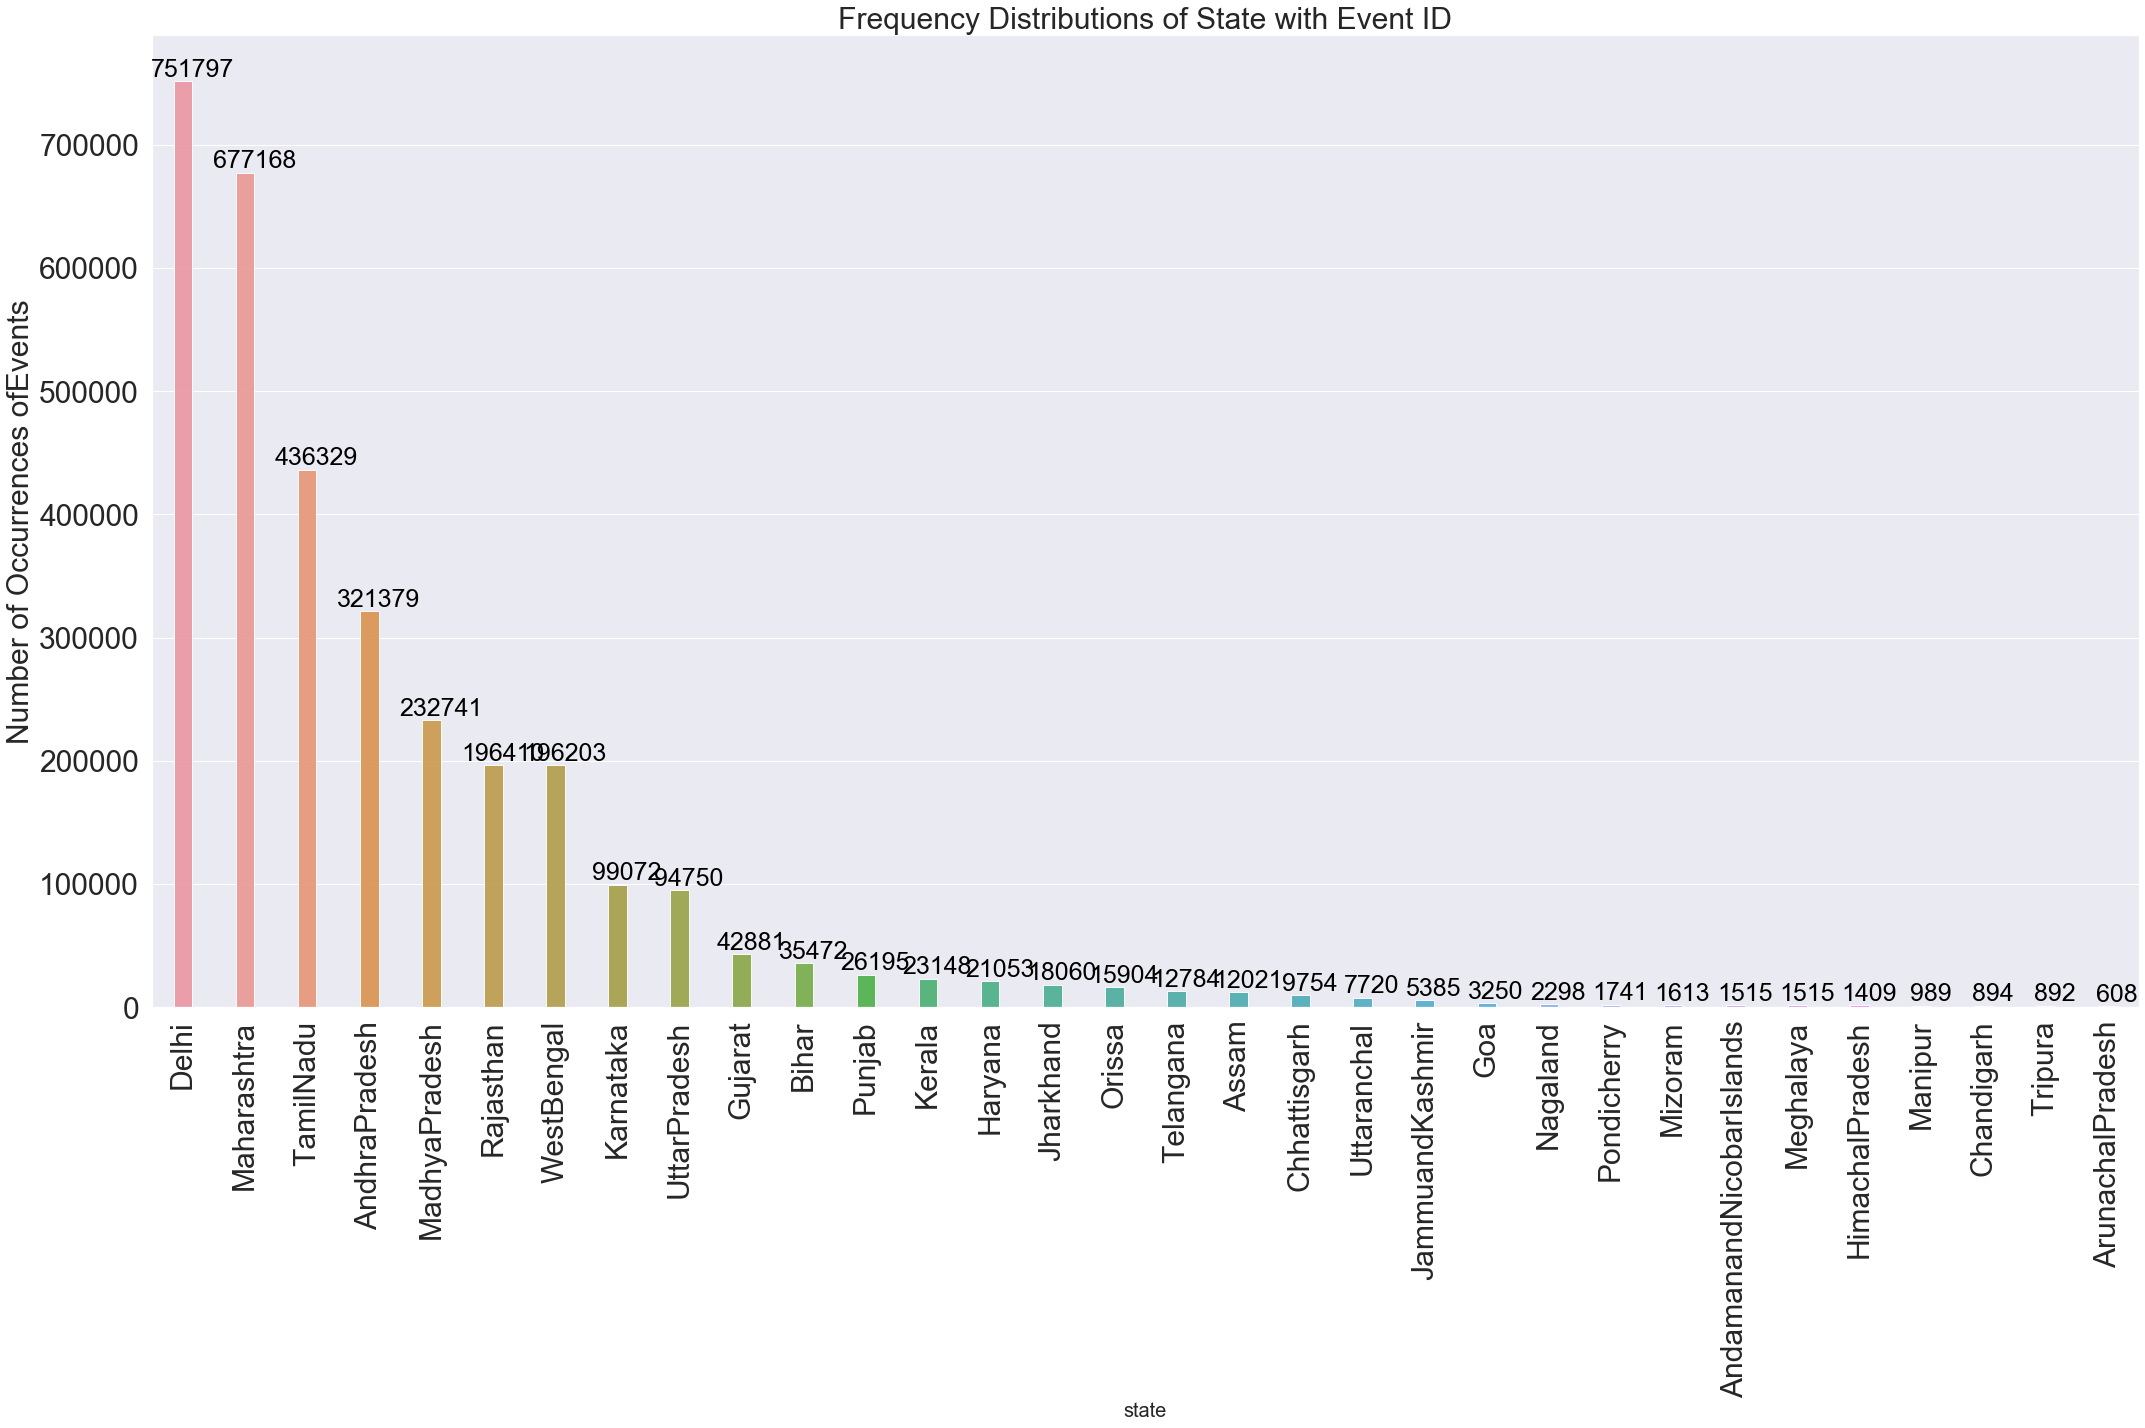

In [ ]:
plotbarplot(df_events, 'state', 32, 'State', 'Events', 1, 'Frequency Distributions of State with Event ID' )

#### Top 10 States having the maximum events

In [ ]:
df_events['state'].value_counts()[:10]

Delhi            751733
Maharashtra      677105
TamilNadu        436282
AndhraPradesh    321332
MadhyaPradesh    232690
Rajasthan        196361
WestBengal       196161
Karnataka         99058
UttarPradesh      94750
Gujarat           42881
Name: state, dtype: int64

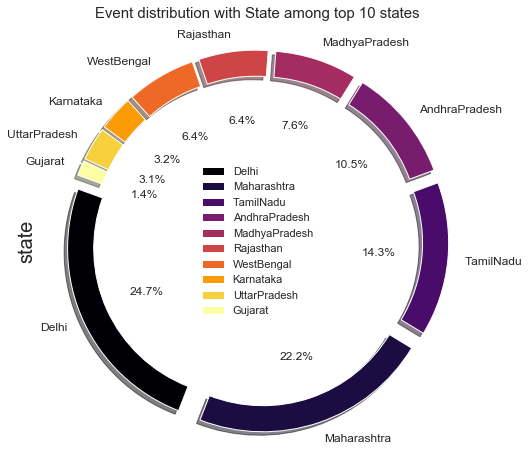

In [ ]:
space = np.ones(10)/10
df_events['state'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=160, figsize=(8,8), cmap='inferno', legend=True)
labels = df_events['state']
plt.legend(loc=10)
plt.ylabel('state',fontsize=20)
plt.title('Event distribution with State among top 10 states',fontsize=15)
plt.show()

### Observations
1. Delhi has most of the events, followed by Maharastra, TamilNadu, Andhra Pradesh, Madhya Pradesh, Rajasthan, West Bengaland Karnataka
2. Most of Northern East states are not having phone activity (very few events generated) as can be observed from above bar graph

### Frequency Distributions of State with Devices<a class="anchor" id=section4_2_3></a>

In [ ]:
df_unique_devices = df_events.drop_duplicates(subset='device_id', keep="first").reset_index()
df_unique_devices.count()

index        60866
event_id     60866
device_id    60865
timestamp    60866
longitude    60866
latitude     60866
city         60866
state        60866
dtype: int64

In [ ]:
item_count = df_events['device_id'].value_counts().sort_values(ascending=False)
item_count.head(10)
df = df_events[df_events['device_id'].isin(item_count.index)]
df.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


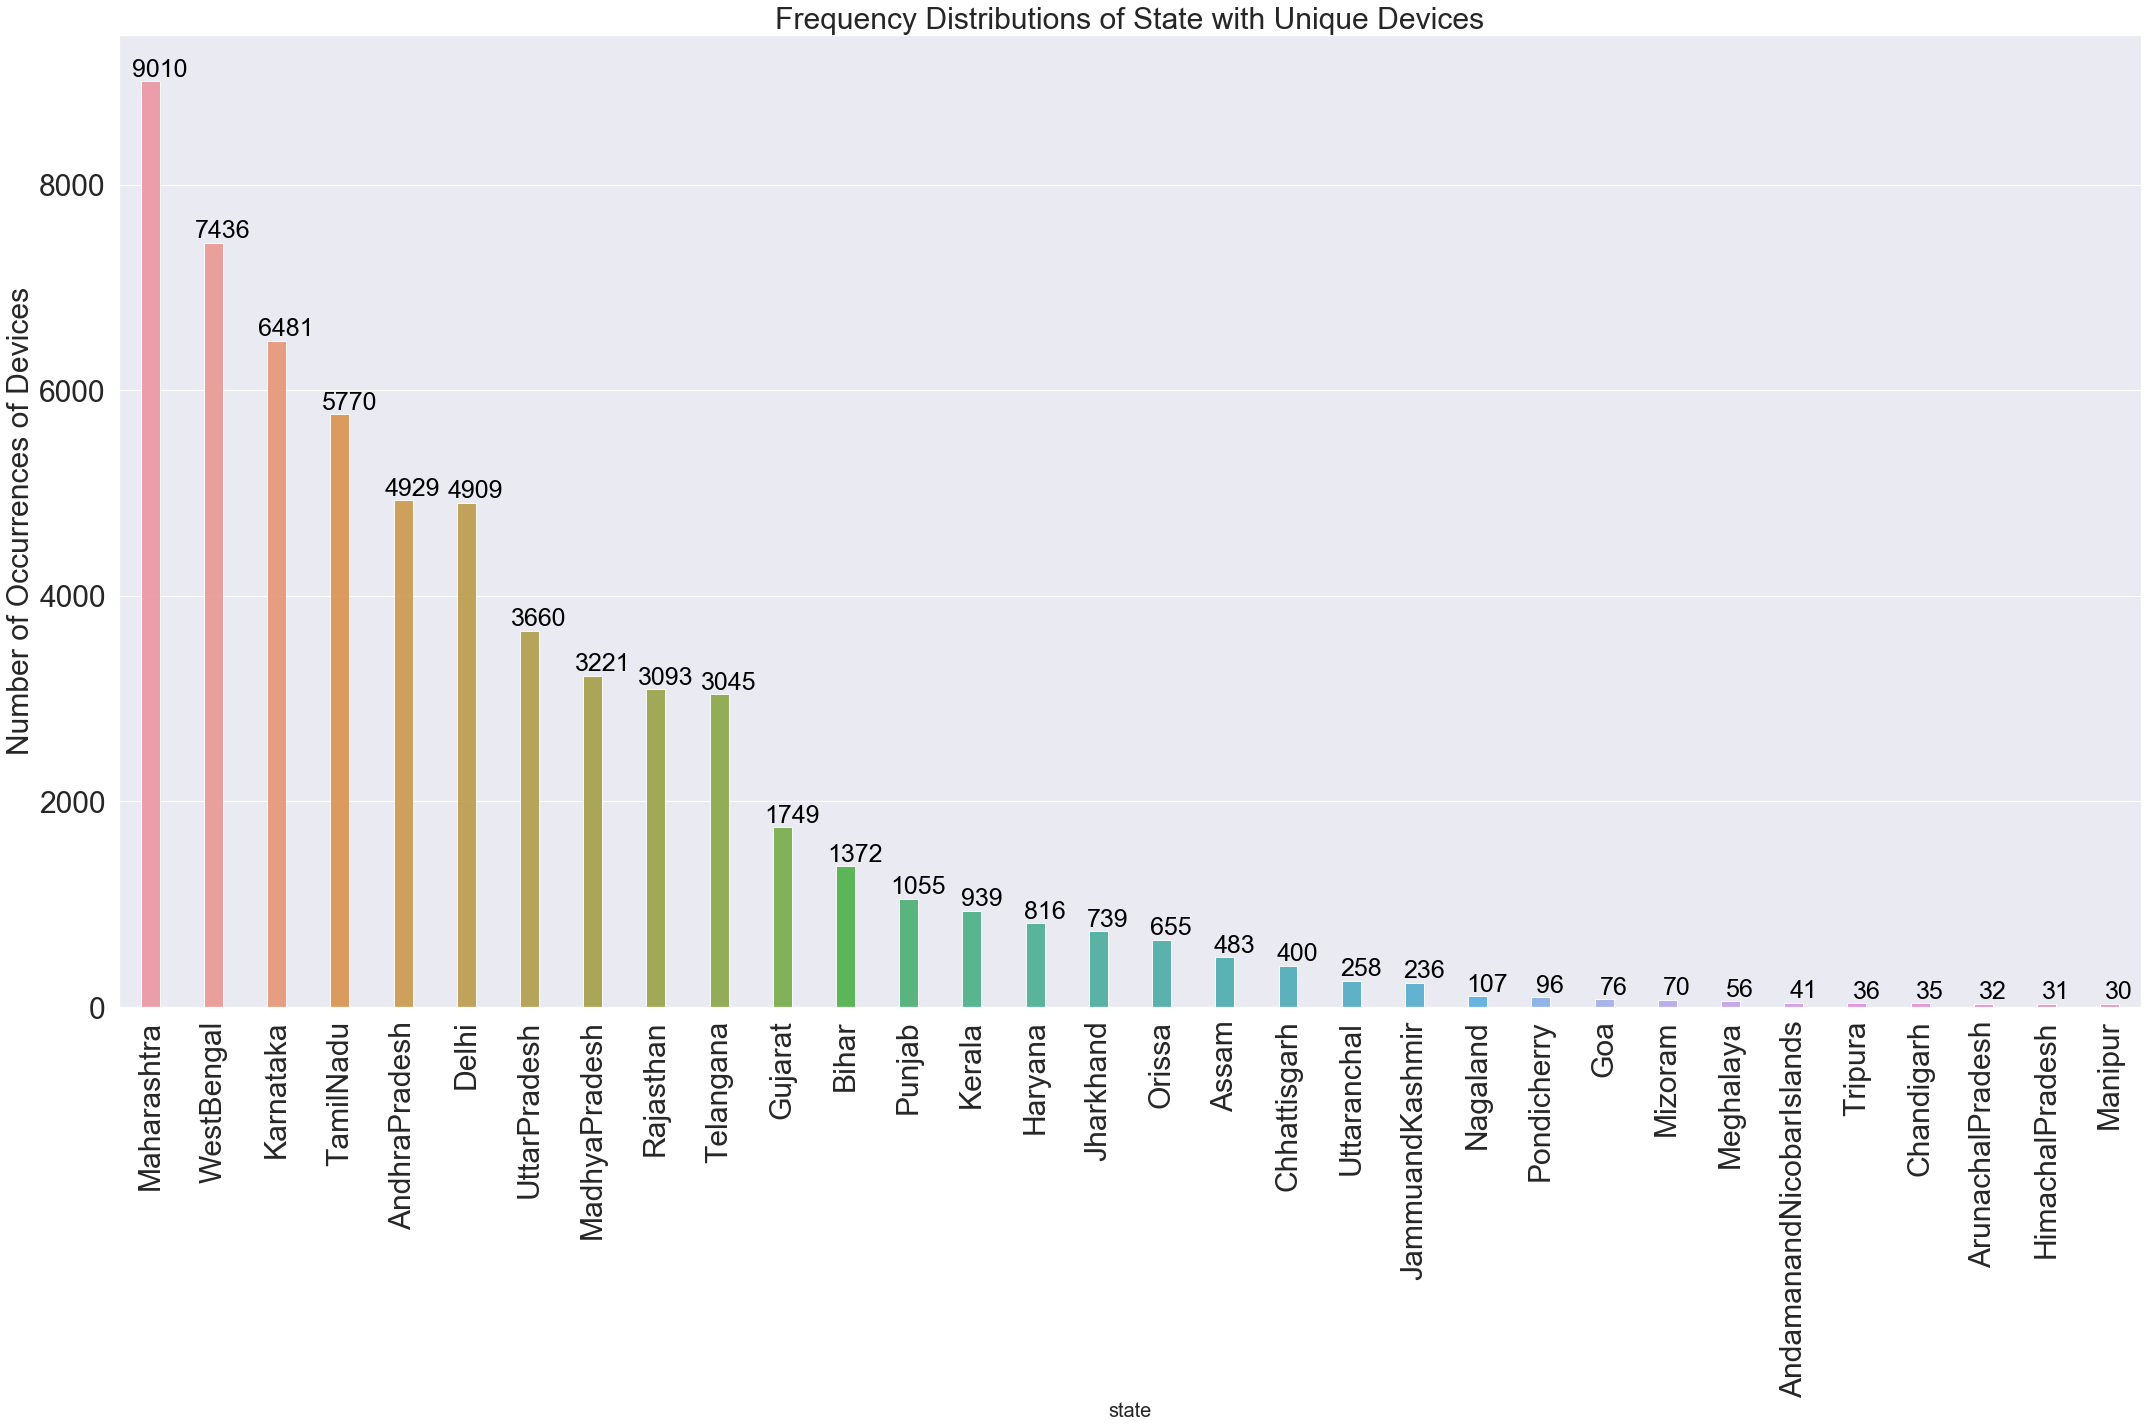

In [ ]:
plotbarplot(df_unique_devices, 'state', 32, 'State', ' Devices', 1,\
                'Frequency Distributions of State with Unique Devices' )

### Observations

As now we have taken unique devices and plotted, we can observe that
1. Out of total 60865 **Maharashtra** has **HIGHEST** number of devices, followed by West Bengal, Karnataka, TamilNadu, Andhra Predesh, Delhi, UttarPradesh, Madhya Pradesh, Rjasthan, Telangana, Gujarat, Bihar and Punja
2. comparing to the observations of events and this data, the surprising fact is that Delhi is having only 4909 (which is 6th position in device count), but generating huge number of events (751797). This means people in delhi are very activley using their mobiles.
3. Similarly West Bengal has second highest number of devices, but the events generated are relatively less. Hence the people in West Bengal are using the mobile moderately.


### Analysis of city <a class="anchor" id=section4_2_4></a>

In [ ]:
df_events.groupby('city')['event_id'].count().sort_values(ascending=False)

city
Delhi               744276
Chennai             366875
Pune                317276
Mumbai              285246
Visakhapatnam       235772
                     ...  
Ramachandrapuram       279
Sirhind                269
Tadepallegudem         264
Brajrajnagar           263
Kovilpatti             258
Name: event_id, Length: 933, dtype: int64

### Frequency Distribution of city with Event ID <a class="anchor" id=section4_2_5></a>

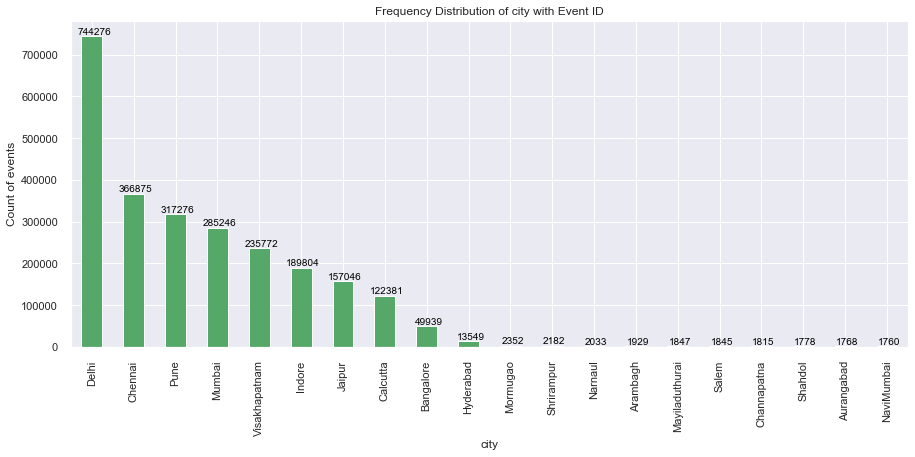

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby('city')['event_id'].count().sort_values(ascending=False)[:20].plot(kind='bar', color='g')
plt.ylabel('Count of events')
plt.title('Frequency Distribution of city with Event ID')
plotvalues(ax, 10)

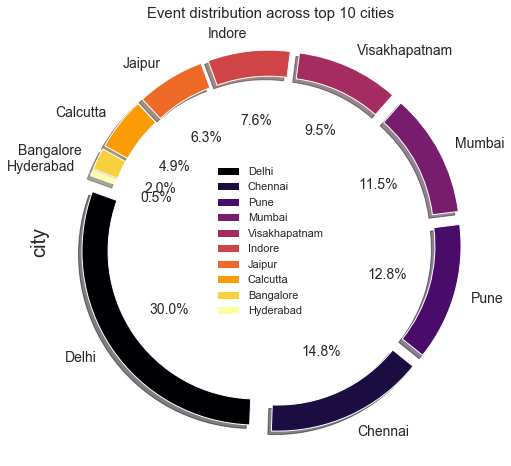

In [ ]:
space = np.ones(10)/10
df_events['city'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=160, figsize=(8,8), cmap='inferno', legend=True)
labels = df_events['city']
plt.legend(loc=10)
plt.ylabel('city',fontsize=20)
plt.title('Event distribution across top 10 cities',fontsize=15)
plt.show()

### Frequency distribution of events across bottom 20 cities<a class="anchor" id=section4_2_6></a>

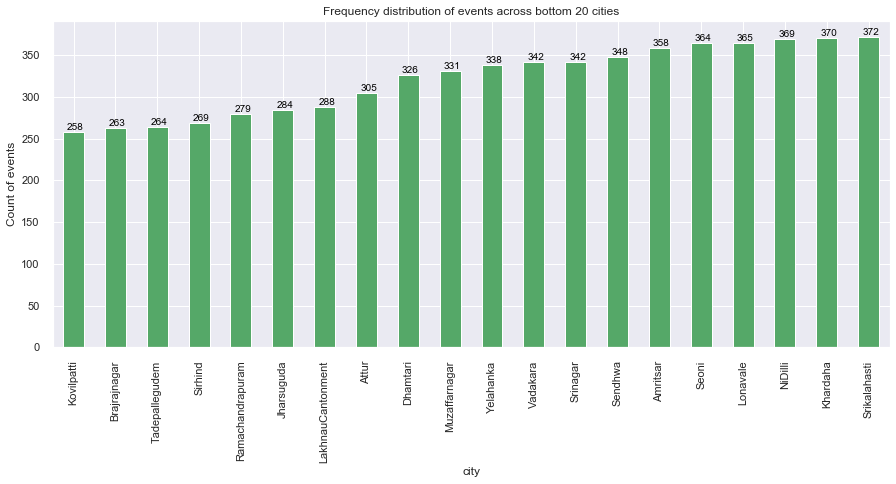

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby('city')['event_id'].count().sort_values(ascending=True)[:20].plot(kind='bar', color='g')
plt.ylabel('Count of events')
plt.title('Frequency distribution of events across bottom 20 cities')
plotvalues(ax, 10)

### Frequency distribution of devices across top 20 cities<a class="anchor" id=section4_2_7></a>

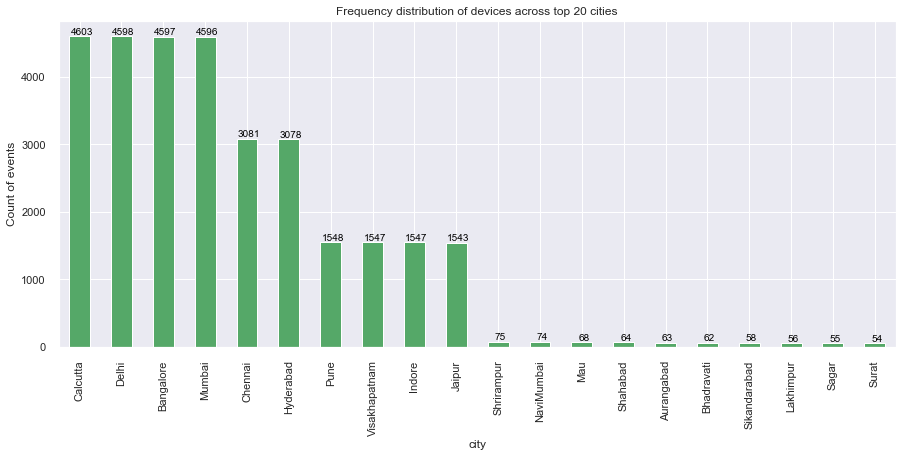

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_unique_devices.groupby('city')['device_id'].count().sort_values(ascending=False)[:20].plot(kind='bar', color='g')
plt.ylabel('Count of events')
plt.title('Frequency distribution of devices across top 20 cities')
plotvalues(ax, 10)

### Observations <a class="anchor" id=section4_2_obs1></a>
- Out of all states, Delhi is having maximum phone activity.
- We can observe that out of other Metros Chennai, Mumbai are having most of the events
- Also other top cities having the maximum phone activity are Pune, Visakhapatnam, Indore, Jaipur, Bangalore.
- Similarly the cities having very low phone activity are Kovilpatti, Brajrajnagar, Tadepalligudem, Sirhind, Ramachandrapuram.
Most of the devices are in Calcutta, Dehli, Bangalore, Mumbai, Chennai and Hyderabad, followed by Pune, Visakhapatnam, Indore and Jaipur

### Analysis on State and City <a class="anchor" id=section4_2_8></a>

#### Frequency Distributions of State, City with Event ID and Device ID<a class="anchor" id=section4_2_9></a>

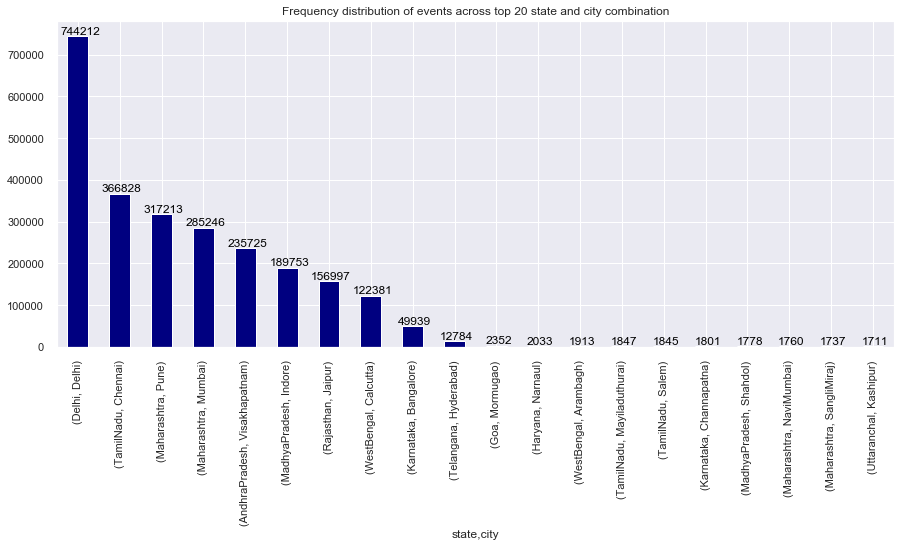

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby(['state','city'])['event_id'].count().\
    sort_values(ascending=False)[:20].plot(kind='bar', color='navy')
plt.title('Frequency distribution of events across top 20 state and city combination')
plotvalues(ax)

### Observations <a class="anchor" id=section4_2_9_obs></a>
- Delhi city has highest number of events, followed by Chennai, Pune, Mumbai, Visakhapatnam, Indore, Jaipur, Calcutta and Bangalore, which means that phone acitivity is majorly around Metros like (Delhi, Mumbai, Cheanni, Calcutta) and couple of Top cities like Pune, Visakhaptham, Indore and Jaipur, Bangalore.
- Phone activity is very much concentrated in few cities

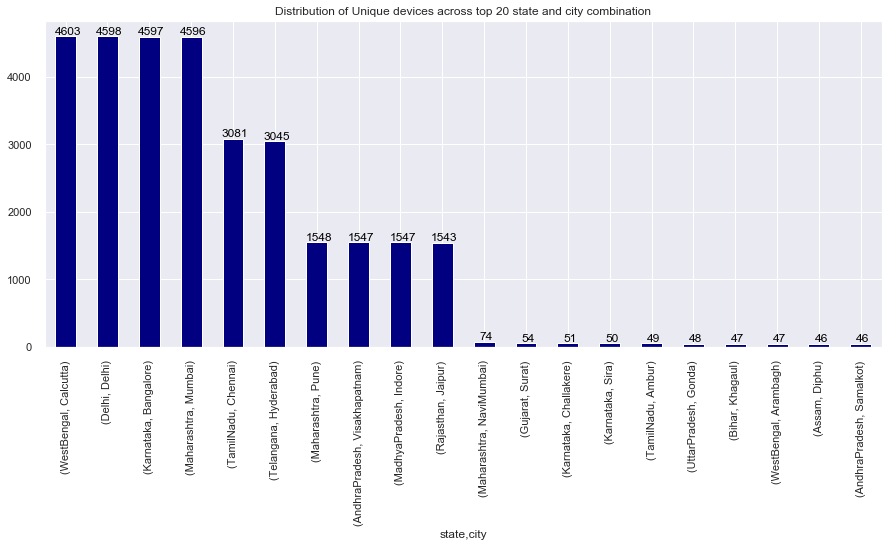

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_unique_devices.groupby(['state','city'])['device_id'].count().\
    sort_values(ascending=False)[:20].plot(kind='bar', color='navy')
plt.title('Distribution of Unique devices across top 20 state and city combination')
plotvalues(ax)

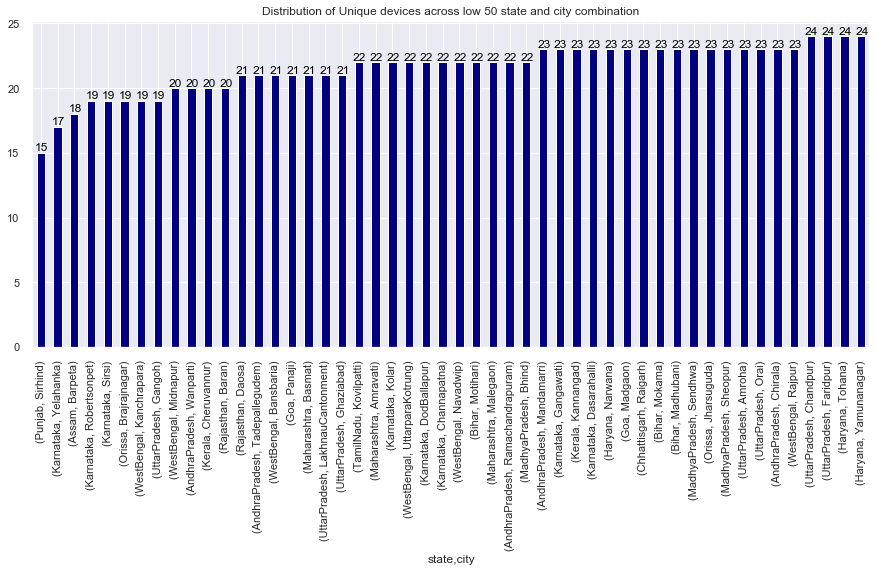

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_unique_devices.groupby(['state','city'])['device_id'].count().\
    sort_values(ascending=True)[:50].plot(kind='bar', color='navy')
plt.title('Distribution of Unique devices across low 50 state and city combination')
plotvalues(ax)

### Observations <a class="anchor" id=section4_2_9_obs2></a>
- Most of the devices are in Metros (Calcutta, Delhi, Mumbai, Chennai) and Major Cities Calcutta, Delhi, Bangalore, Mumbai, Chennai, Hyderabad, Pune, Visakhapatnam, Indore, Jaipur
- Also the next higher set of devices are in non-metro top10 cities like Pune, Visakhapatnam, Indore and Japiur.
- Rest all cities have very little number of devices, which also we can see from the 2nd graph



### Finding outliers in the events data<a class="anchor" id=section4_2_10></a>

### Latitude and Longitude

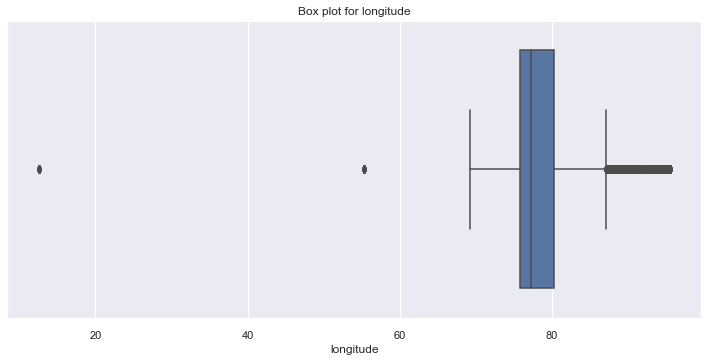

In [ ]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df_events['longitude'])
plt.tight_layout()
plt.title('Box plot for longitude')
plt.show()

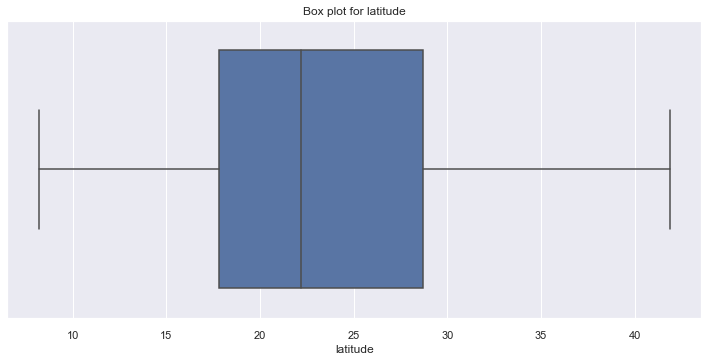

In [ ]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df_events['latitude'])
plt.tight_layout()
plt.title('Box plot for latitude')
plt.show()

## Gender and Age Data<a class="anchor" id=section5></a>

### Analysis<a class="anchor" id=section51></a>

In [ ]:
df_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
df_gender_age.shape

(74645, 4)

In [ ]:
df_gender_age.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
df_gender_age.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [ ]:
df_gender_age.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

### Pre-Profiling <a class="anchor" id=section51></a>

In [ ]:
#profile_gender_age = pandas_profiling.ProfileReport(df_gender_age)
#profile_gender_age.to_file("Gender_Age_pre_profiling.html")
IFrame(src='Gender_Age_pre_profiling.html', width=900, height=500)

In [ ]:
df_gender_age.device_id.nunique()

74645

In [ ]:
#Convert the device_id to float so that when we join, we dont have issues
df_gender_age.device_id = df_gender_age.device_id.astype(float)
df_gender_age.dtypes

device_id    float64
gender        object
age            int64
group         object
dtype: object

In [ ]:
df_gender_age['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

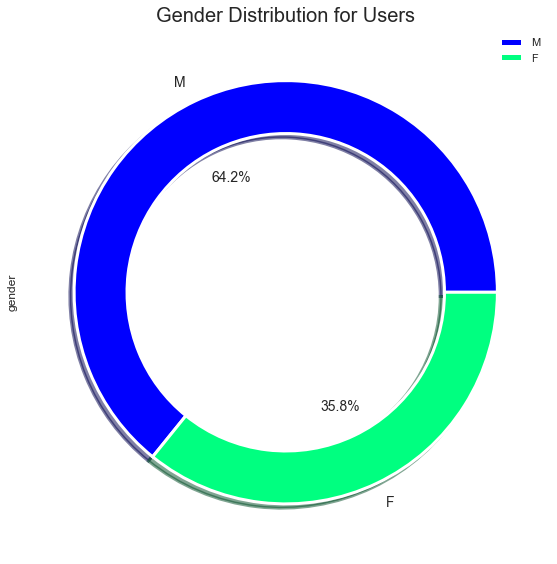

In [ ]:
df_gender_age['gender'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.25, linewidth=3), shadow=True, labeldistance =1.1,
                                           startangle=0, figsize=(8,8), cmap='winter', legend=True)
labels = df_gender_age['gender']
plt.title('Gender Distribution for Users',fontsize=20)
plt.tight_layout()
plt.show()

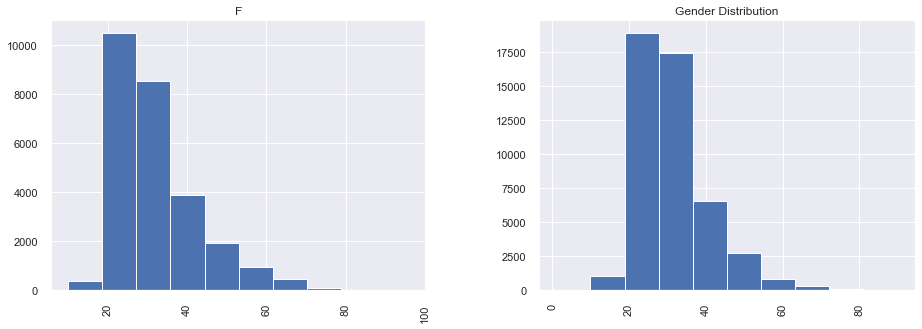

In [ ]:
ax = df_gender_age.hist(by='gender',column = 'age',figsize=(15,5))
plt.title('Gender Distribution')
plt.show()

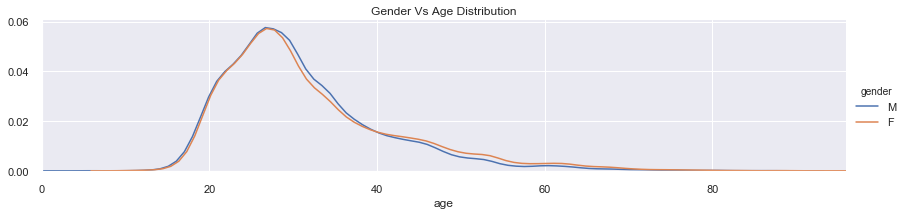

In [ ]:
facet = sns.FacetGrid(df_gender_age, hue="gender",aspect=4, hue_order=['M', 'F'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, df_gender_age['age'].max()))
facet.add_legend()
plt.title("Gender Vs Age Distribution")
plt.show()

In [ ]:
print("distinct age_group:", set(df_gender_age['group']))

distinct age_group: {'M32-38', 'M29-31', 'F33-42', 'F23-', 'F43+', 'M39+', 'M23-26', 'F27-28', 'M22-', 'F29-32', 'F24-26', 'M27-28'}


In [ ]:
df_gender_age.groupby('group')['device_id'].count().sort_values(ascending=False)

group
M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: device_id, dtype: int64

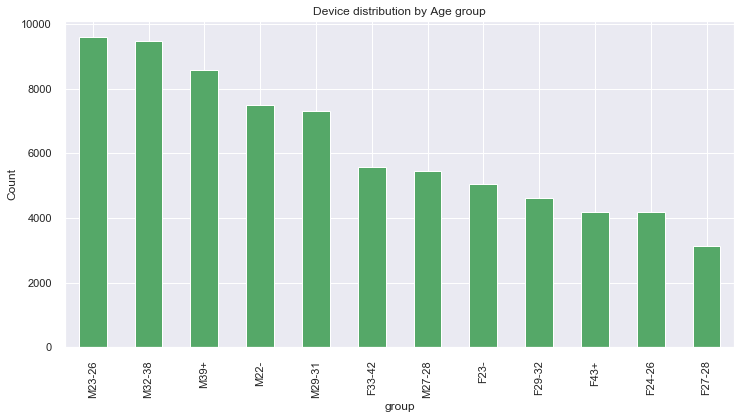

In [ ]:
plt.figure(figsize = (12, 6))
df_gender_age.groupby('group')['device_id'].count().sort_values(ascending=False).plot(kind='bar',color='g')
plt.ylabel('Count')
plt.title('Device distribution by Age group')
plt.show()


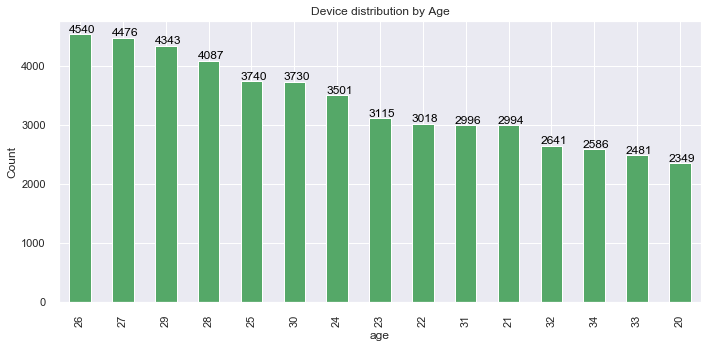

In [ ]:

plt.figure(figsize = (10, 5))
ax = df_gender_age.groupby('age')['device_id'].count().sort_values(ascending=False)[:15].plot(kind='bar',color='g')
#df_gender_age.groupby('group')['device_id'].count().sort_values(ascending=False).plot(kind='bar',color='g')
plt.title('Device distribution by Age')
plt.ylabel('Count')
plotvalues(ax, 12)
plt.tight_layout()
plt.show()

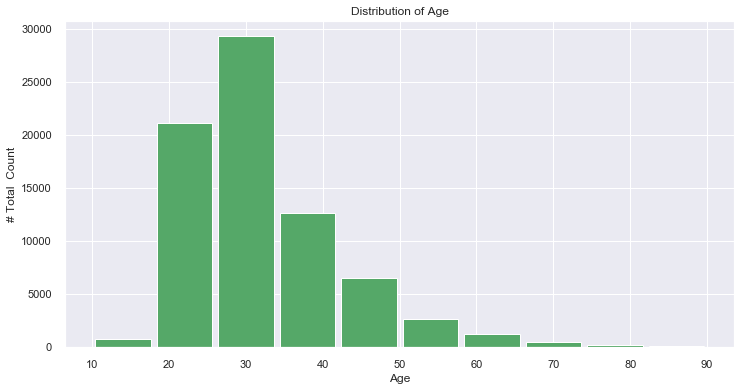

In [ ]:
plt.figure(figsize=(12,6))
range = (10,90)
plt.hist(df_gender_age['age'], 10, range, color= 'g', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Total  Count")
plt.xlabel("Age")
plt.title('Distribution of Age')
plt.show()

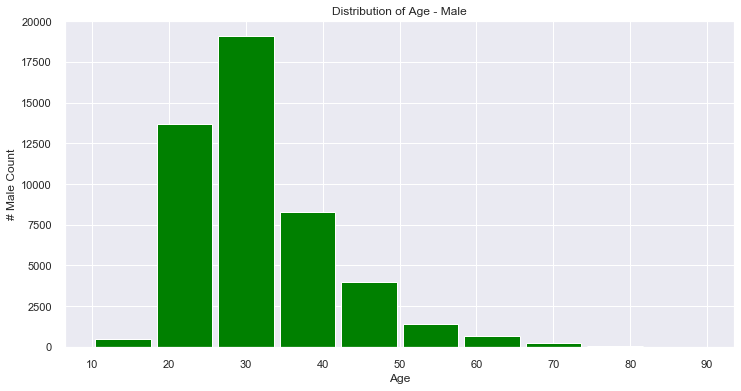

In [ ]:
plt.figure(figsize=(12,6))
range = (10,90)
ax = plt.hist(df_gender_age[df_gender_age['gender']=='M']['age'], 10, 
                  range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Male Count")
plt.title('Distribution of Age - Male')
plt.xlabel("Age")
#plotvalues(ax, 20)
plt.show()

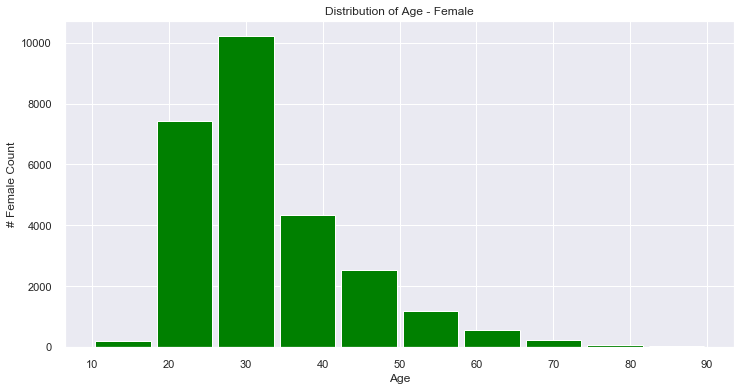

In [ ]:
plt.figure(figsize=(12,6))
range = (10,90)
ax = plt.hist(df_gender_age[df_gender_age['gender']=='F']['age'], 10, 
                  range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Female Count")
plt.xlabel("Age")
plt.title('Distribution of Age - Female')
#plotvalues(ax, 20)
plt.show()

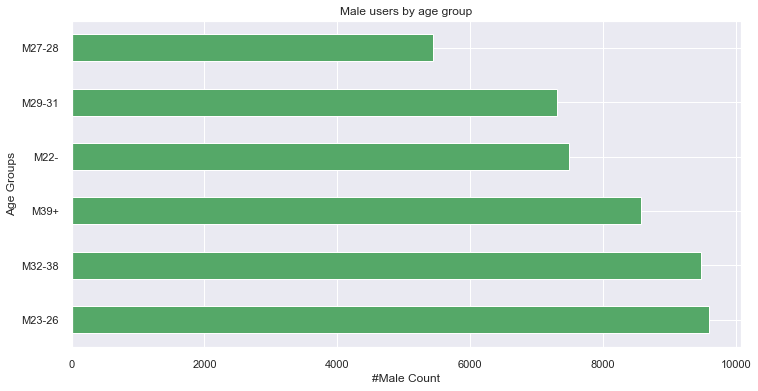

In [ ]:
# Male users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(12,6))
#df_gender_age.groupby('gender' == 'M')['group'].count().sort_values(ascending=False)[:15].plot(kind='bar',color='g')
ax = df_gender_age[df_gender_age['gender']=='M']['group'].value_counts().plot.barh(color='g')
plt.title('Male users by age group')
plt.xlabel("#Male Count")
plt.ylabel("Age Groups")
plt.show()

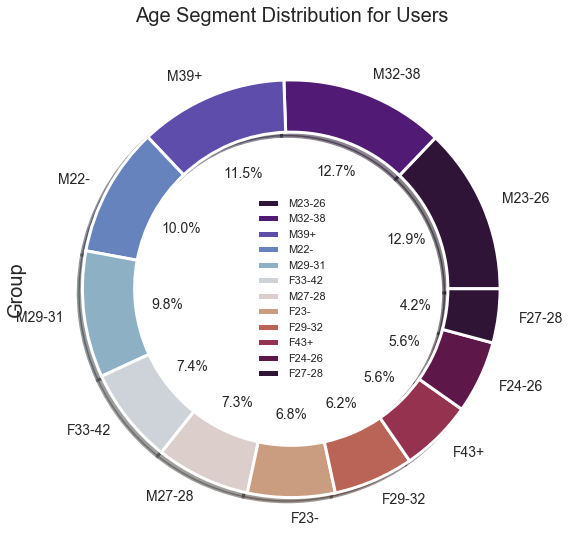

In [ ]:
df_gender_age['group'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.25, linewidth=3), shadow=True, labeldistance =1.1,
                                           startangle=0, figsize=(8,8), cmap='twilight_shifted', legend=True)
labels = df_gender_age['group']
# plt.legend(loc=0)
plt.ylabel('Group',fontsize=20)
plt.title('Age Segment Distribution for Users',fontsize=20)
plt.tight_layout()
plt.show()

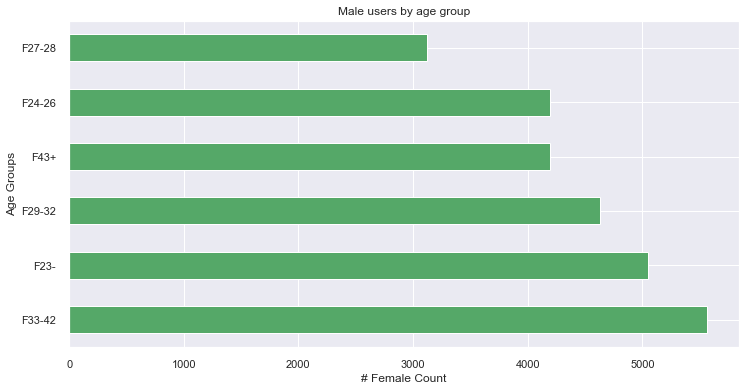

In [ ]:
# Female users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(12,6))
df_gender_age[df_gender_age['gender']=='F']['group'].value_counts().plot.barh(color='g')
plt.xlabel("# Female Count")
plt.ylabel("Age Groups")
plt.title('Male users by age group')
plt.show()

### Outliers in Age

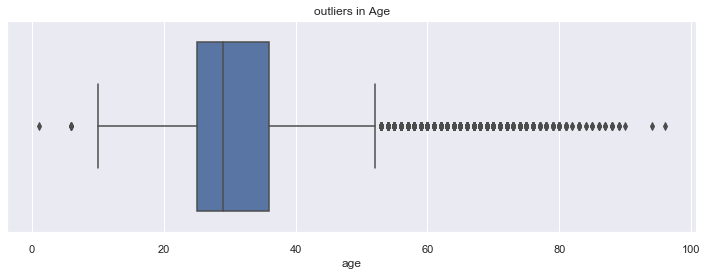

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_gender_age['age'])
plt.title('outliers in Age')
plt.tight_layout()
plt.show()

In [ ]:
#df_gender_age['gender'].sort_values(ascending=False).barplot()
df_gender_age[df_gender_age['age'] < 10].nunique()


device_id    5
gender       1
age          2
group        1
dtype: int64

In [ ]:
df_gender_age[df_gender_age['age'] > 70].nunique()

device_id    275
gender         2
age           22
group          2
dtype: int64

In [ ]:
df_gender_age['age'].nunique()

85

In [ ]:
missing_values_with_percent(df_gender_age)

group        0
age          0
gender       0
device_id    0
dtype: int64
group        0.0
age          0.0
gender       0.0
device_id    0.0
dtype: float64


,Total Missed,Missed %
group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0




### Observations<a class="anchor" id=section5obs></a>
1. There are total 74645 records with 4 columns present in the data
2. 2 columns are numerics and other 2 columns are categorical
3. The average age is 31.4 years, with range of 1 year to 96 years (see min, max)
4. device_id column is common as well along with events_data
5. The median age value is 29, Also the quartile range is from 25 to 36 years. This indicates that most of the population is in 25 to 36 years and very few outliers are present
6. There are no missing values in this data
7. Gender has two values 'Male and 'Female' with 64.2% and 32.8% respectively
8. Age group has 12 categories with mix of Male and Female age groups
9. We can also observe that there are no duplicated device_ids

#### Few more Observations<a class="anchor" id=section5obs2></a>

1. People of age group 20 to 40 are using mobiles more as compared to other age groups.
2. Very few people are using mobile actively after the age of 60.
3. Males are using mobile actively than females.
4. Mobile is used for people with age more than 10 years.
5. Person whose age is 1 is also using mobile so it is outlier
6. Similarly the devices are more with age values of 21-35 years relative to other ages
3. This is same for each gender type (Male and Female)

## Phone brand devicemodel data<a class="anchor" id=section6></a>

### Analysis<a class="anchor" id=section61></a>

In [ ]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null float64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
df_phone_brand_device_model.device_id.nunique()

87726

In [ ]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [ ]:
df_phone_brand_device_model.shape

(87726, 3)

### Pre-Profiling<a class="anchor" id=section62></a>

In [ ]:
#profile_phone_brand_devicemodel = pandas_profiling.ProfileReport(df_phone_brand_device_model)
#profile_phone_brand_devicemodel.to_file("phone_brand_device_model_pre_profiling.html")
IFrame(src='phone_brand_device_model_pre_profiling.html', width=1000, height=500)

In [ ]:
missing_values_with_percent(df_phone_brand_device_model)

device_model    0
phone_brand     0
device_id       0
dtype: int64
device_model    0.0
phone_brand     0.0
device_id       0.0
dtype: float64


,Total Missed,Missed %
device_model,0,0.0
phone_brand,0,0.0
device_id,0,0.0


In [ ]:
df_phone_brand_device_model['phone_brand'].value_counts().head(10)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: phone_brand, dtype: int64

In [ ]:
df_phone_brand_device_model.device_id = df_phone_brand_device_model.device_id.astype(float)
df_phone_brand_device_model.dtypes

device_id       float64
phone_brand      object
device_model     object
dtype: object

In [ ]:
df_phone_brand_device_model['device_model'].nunique()

1467

#### Observations<a class="anchor" id=section62obs></a>

1. There are total 87726 records with 3 columns present in the data
2. 1 Numeric column and 2 object columns are present in the data.
3. The data has non-english (chinese) characters in the brand and device_model
4. There are no missing values in this data as seen just above


#### Also it is observed that device_id is present in all the datasets, and hence we can use this to merge all the three datasets after the missing values are filled. Apart from this we can also see the type of device_id is float in events_data where it is integer in other two datasets.So, we need to convert the integer values to float

In [ ]:
lang_mapped_brands = { '华为':'Huawei', '小米':'Xiaomi', 
                         '三星':'Samsung', '魅族':'Meizu','酷派':'Coolpad',
                         '乐视':'LeEco', '联想 ':'Lenovo','奇酷':'Qiku',
                         '斐讯':'Feixun','中国移动':'China Mobile',
                         '天语':'Amagatarai','至尊宝':'Extreme treasure', 
                         '欧博信':'Obersin', '优米':'Quality rice',
                         '努比亚':'Nubian', '惠普':'HP', 
                         '尼比鲁':'Nibiru', '美图':'MitO', '乡米':'Xiangmi', '摩托罗拉':'Motorola',
                         '锤子':'Meng Mi', '富可视':'InFocus','海信':'Hisense',
                         '百立丰':'Bilifeng','一加':'OnePlus', '语信' :'Yuxin', '海尔' :'Haier', 
                         '酷比':'Coolby', '纽曼':'Newman',
                         '波导':'waveguide', '朵唯':'Duowei',
                         '聆韵':'Listening rhyme', '酷珀':'Cupper', '爱派尔':'Aipal', '青葱':'scallion',
                         '果米':'fruit rice', '华硕':'ASUS', '昂达':'Onda', '艾优尼':'Ayuni',
                         '康佳':'Konka', '优购':'Yougo', '邦华':'Banghua', '赛博宇华':'Saibo Yuhua', 
                         '黑米':'Black Rice', '先锋':'Pioneer', 'E派':'E School', 
                         '神舟':'Shenzhou', '诺基亚':'Nokia',
                         '普耐尔':'Puner', '糖葫芦':'Candied Gourd', '亿通':'Yitong', '欧新':'Ou Xin',
                         '米奇':'Mickey', '酷比魔方':'Cube Rubiks Cube', '蓝魔':'Blue Magic', 
                         '小杨树':'Little Poplar','贝尔丰':'Bell Fung', '糯米':'Glutinous Rice',
                         '米歌' :'Mi Ge' , 'E人E本':'E Man E Ben', '西米':'Simi', '大Q':'Big Q',
                         '台电':'Taipower', '飞利浦':'Philips', '唯米':'Vimi', 
                          '大显':'Da Xian', '长虹':'Changhong',
                         '维图':'Vitu','青橙':'Green Orange', '本为':'Originally', '虾米':'Shrimp', 
                         '夏新':'Xiaxin', '帷幄':'Virgin', '百加':'Baijia', '欧奇':'Ouqi', 
                         '世纪星':'Century Star', '智镁':'Chi Magnesium',
                         '欧比':'Obi', '基伍':'Kivu', '飞秒':'Femtosecond', '德赛':'Desai', 
                         '易派':'Epai', '谷歌':'Google', '金星数码':'Venus Digital', 
                      '广信':'Guangxin', '诺亚信':'Noyaxin',      
                         '凯利通':'Bai Mi', '唯比':'Da Ke Cola', '欧沃':'Bao Jie Xun', 
                         '丰米':'You Yu', '恒宇丰':'Shou Yun', '奥克斯':'Rumi', 
                         '西门子':'Rigao', '欧乐迪':'Wofengfeng','白米':'Mo Le', 
                         '大可乐':'Xian Mi', '宝捷讯':'Kelly Pass',
                         '优语':'Vibe', '首云':'Ovo', '瑞米':'Fengmi', '瑞高':'Hengyufeng', 
                         '沃普丰':'Aux', '摩乐':'Siemens', '鲜米':'Oledi', '梦米': 'Meng Mi'}

#### Replace the chinese values in the brand with English values<a class="anchor" id=section63></a>

In [ ]:
df_ph_brand_model = df_phone_brand_device_model.replace(lang_mapped_brands)
df_ph_brand_model['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Feixun', 'China Mobile', 'HTC', 'Amagatarai',
       'Extreme treasure', 'LG', 'Obersin', 'Quality rice', 'ZUK',
       'Nubian', 'HP', 'Nibiru', 'MitO', 'Xiangmi', 'Motorola', 'Meng Mi',
       'InFocus', 'LeEco', 'Hisense', 'Bilifeng', 'OnePlus', 'Yuxin',
       'Haier', 'Coolby', 'Newman', 'waveguide', 'Duowei',
       'Listening rhyme', 'TCL', 'Cupper', 'Aipal', 'LOGO', 'scallion',
       'fruit rice', 'ASUS', 'Onda', 'Ayuni', 'Konka', 'Yougo', 'Banghua',
       'Saibo Yuhua', 'Black Rice', 'Lovme', 'Pioneer', 'E School',
       'Shenzhou', 'Nokia', 'Puner', 'Candied Gourd', 'Yitong', 'Ou Xin',
       'Mickey', 'Cube Rubiks Cube', 'Blue Magic', 'Little Poplar',
       'Bell Fung', 'Glutinous Rice', 'Mi Ge', 'E Man E Ben', 'Simi',
       'Big Q', 'Taipower', 'Philips', 'Vimi', 'Da Xian', 'Changhong',
       'Vitu', 'Green Orange', 'Originally', 'Shrimp', 'Xiaxin', 'Virgin',
       'Ba

In [ ]:
df_ph_brand_model['phone_brand'].value_counts().head(10)

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: phone_brand, dtype: int64

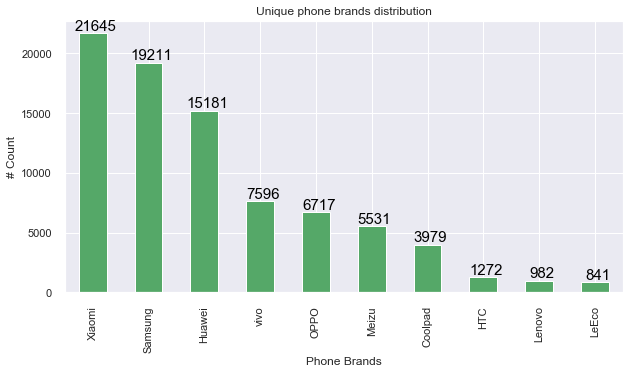

In [ ]:
plt.figure(figsize=(10,5))
ax = df_ph_brand_model['phone_brand'].value_counts().head(10).plot.bar(color='g')
plt.ylabel("# Count")
plt.xlabel("Phone Brands")
plt.title('Unique phone brands distribution')
plotvalues(ax, 15)

In [ ]:
df_ph_brand_model['device_model'].replace({'红米note': 'Redmi note', '荣耀6 plus': 'Redmi 1S',
                                                     '天鉴W900S': 'Tianjian W900S',
                                                     '乐檬X3': 'Music lemon X3', '荣耀6': 'Glory 6', 
                                                     '荣耀畅玩4X': 'Honor Play 4X',
                                                     '荣耀3C': 'Glory 3C', '荣耀6 Plus':'Honor 6 Plus' }, inplace=True)

In [ ]:
pd.crosstab(df_ph_brand_model['device_model'],df_ph_brand_model['phone_brand'],margins=True).\
        sort_values('All',ascending=False).head(10)

phone_brand,ASUS,Aipal,Amagatarai,Aux,Ayuni,Bai Mi,Baijia,Banghua,Bao Jie Xun,Bell Fung,...,Yitong,You Yu,Yougo,Yuxin,ZUK,fruit rice,scallion,vivo,waveguide,All
device_model,,,,,,,,,,,,,,,,,,,,,
All,67,46,161,8,48,1,12,22,1,29,...,28,1,25,170,70,10,7,7596,44,87726
Redmi note,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3500
MI 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2739
MI 2S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2547
Galaxy Note 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2378
MI 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2256
Galaxy S4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1910
Galaxy Note 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1877
Glory 6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1471


In [ ]:
lang_mapped_models = {'红米1S' : 'Redmi 1S', '红米': 'Redmi',
                      '红米2' : 'Redmi 2', '红米2A': 'Redmi 2A',
                      '红米note增强版': 'Redmi Note Enhanced Edition', '红米Note2': 'Redmi Note2'}


In [ ]:
df_ph_brand_model = df_ph_brand_model.replace(lang_mapped_models)

In [ ]:
df_ph_brand_model['device_model']
xiaomi_brand = df_ph_brand_model[df_ph_brand_model['phone_brand'] == 'Xiaomi']

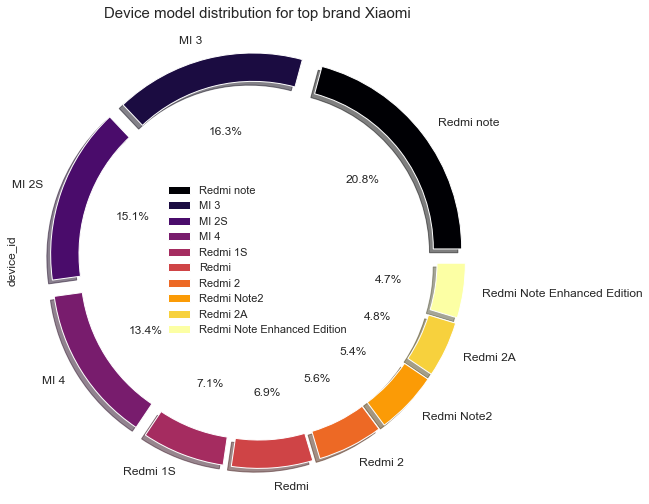

In [ ]:
space = np.ones(10)/10
xiaomi_brand.groupby('device_model').device_id.count().\
    sort_values(ascending=False).head(10).plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=0, figsize=(9,9), cmap='inferno', legend=True)
labels = xiaomi_brand.groupby('device_model')
plt.legend(loc=10)
plt.tight_layout()
plt.title('Device model distribution for top brand Xiaomi',fontsize=15)
plt.show()

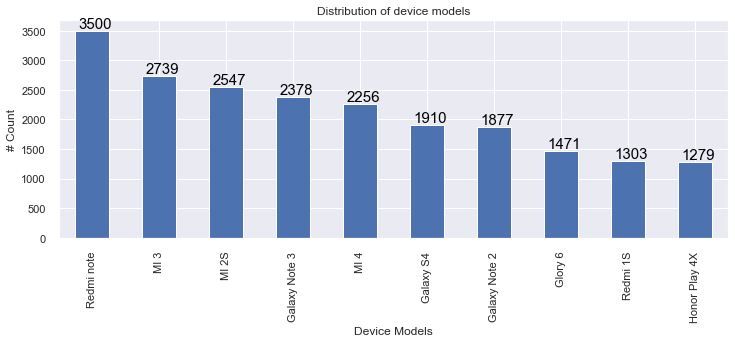

In [ ]:
plt.figure(figsize=(12,4))
ax = df_ph_brand_model['device_model'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Device Models", fontsize=12)
plotvalues(ax, 15)
plt.title('Distribution of device models')
plt.show()

In [ ]:
df_events['device_id']=df_events.device_id.abs()
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


### Missing Values treatment<a class="anchor" id=section7></a>

In [ ]:
events_null_device_ids = pd.isnull(df_events["device_id"])  
df_events[events_null_device_ids]
#df_events[events_null_device_ids].count()
#df_events.isnull().sum()

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [ ]:
df_events[events_null_device_ids].groupby(['state','city']).count()

event_id  device_id  timestamp  longitude  \
state         city                                                       
AndhraPradesh Visakhapatnam        69          0         69         69   
Delhi         Delhi                69          0         69         69   
Gujarat       Bardoli              16          0         16         16   
              Jetpur               16          0         16         16   
MadhyaPradesh Indore               51          0         51         51   
Maharashtra   Pune                 72          0         72         72   
Punjab        Hoshiarpur           16          0         16         16   
Rajasthan     Jaipur               81          0         81         81   
TamilNadu     Chennai              63          0         63         63   

                             latitude  
state         city                     
AndhraPradesh Visakhapatnam        69  
Delhi         Delhi                69  
Gujarat       Bardoli              16  
              Jetpur               16  
MadhyaPradesh Indore               51  
Maharashtra   Pune                 72  
Punjab        Hoshiarpur           16  
Rajasthan     Jaipur               81  
TamilNadu     Chennai              63

In [ ]:
df_events[events_null_device_ids].groupby(['latitude','longitude']).count()

,,event_id,device_id,timestamp,city,state
latitude,longitude,,,,,
13.149176,80.309272,21,0,21,21,21
13.153332,80.343613,21,0,21,21,21
13.189053,80.335435,21,0,21,21,21
17.752819,83.371738,23,0,23,23,23
17.805195,83.357991,23,0,23,23,23
17.822906,83.342711,23,0,23,23,23
18.566925,73.860165,24,0,24,24,24
18.614812,73.926499,24,0,24,24,24
18.628057,73.862756,24,0,24,24,24


### Handling Missing states<a class="anchor" id=section71></a>

In [ ]:
df_events[df_events['state'].isnull()]['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [ ]:
df_events.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [ ]:
temp = df_events.copy()
city_state_dict = { "Indore": "MadhyaPradesh","Visakhapatnam" : "AndhraPradesh", "Delhi": "Delhi",
                   "Chennai" : "TamilNadu", "Jaipur":"Rajasthan", "Gangarampur":"WestBengal", 
                    "Arambagh": "WestBengal", "Channapatna": "Karnataka", "Pune": "Maharashtra"}

for key, value in city_state_dict.items():
    df_events.loc[(df_events['city'] == key) \
    & (df_events['state'].isnull()),'state'] = value

In [ ]:
df_events['state'].isnull().sum()

0

In [ ]:
#profile_events = pandas_profiling.ProfileReport(df_events, minimal = True)
#profile_events.to_file("events_pre_profiling_3.html")

In [ ]:
df_events.shape

(3252950, 7)

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [ ]:
missing_values_with_percent(df_events)

device_id    453
latitude     423
longitude    423
state          0
city           0
timestamp      0
event_id       0
dtype: int64
device_id    0.013926
latitude     0.013004
longitude    0.013004
state        0.000000
city         0.000000
timestamp    0.000000
event_id     0.000000
dtype: float64


,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
state,0,0.000000
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


### Handling missing device_ids<a class="anchor" id=section72></a>

In [ ]:
#Let us write a utility function here
def fill_deviceId_from_otherrows_with_deviceid_and_longitude(long):
    #find the device id for the mapped longitude
    deviceid_mappedAlready = df_events[(df_events["longitude"]==long) &
                                           ~(pd.isnull(df_events["device_id"]))].head(1)["device_id"].values.item()
    return deviceid_mappedAlready

In [ ]:
### From the data we observed that the latitude and longitude for a given device_id is unique for the missing device_ids
df_events['device_id'] = df_events.apply(lambda x : fill_deviceId_from_otherrows_with_deviceid_and_longitude
                    (x['longitude']) if pd.isnull(x['device_id']) else  x['device_id'],axis = 1)

In [ ]:
df_events.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [ ]:
df_unique_device_events = df_events['device_id'].nunique()

In [ ]:
(df_unique_device_events)

60865

#### We can observe that the missing device_id is now zero

### Handling Missing Latitude and Longitude Values<a class="anchor" id=section73></a>

In [ ]:
def fill_latlong_from_otherrows_with_latlong_of_deviceid(deviceId, type):
    #print(long)
    #find the device id for the mapped longitude
    lat_long_already_mapped = df_events[(df_events["device_id"]==deviceId) & 
                                                ~(pd.isnull(df_events[type]))].head(1)[type].values.item()
    return lat_long_already_mapped

In [ ]:
df_events["longitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                       (x['device_id'], 'longitude') \
                                       if pd.isnull(x['longitude']) else  x['longitude'],axis = 1)

In [ ]:
df_events["latitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                      (x['device_id'], 'latitude') \
                                      if pd.isnull(x['latitude']) else  x['latitude'],axis = 1)

In [ ]:
df_events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### We can observe that all the missing values are filled now

In [ ]:
df_events['device_id']=df_events.device_id.abs()
df_ph_brand_model['device_id']=df_ph_brand_model.device_id.abs()
df_gender_age['device_id']=df_gender_age.device_id.abs()

In [ ]:
#Let us now work on the copies
events_data = df_events.copy()
phone_brand_device_model_data = df_ph_brand_model.copy()
gender_age_data = df_gender_age.copy()

### Merge the datasets<a class="anchor" id=section8></a>

In [ ]:
#Merge device model data with Eents data and then merge with gender-age data

temp = pd.merge(events_data, phone_brand_device_model_data, on='device_id',how='left')
temp.count()

event_id        3252950
device_id       3252950
timestamp       3252950
longitude       3252950
latitude        3252950
city            3252950
state           3252950
phone_brand     3252950
device_model    3252950
dtype: int64

In [ ]:
all_data = pd.merge(temp, df_gender_age ,on='device_id',how='left')
all_data.count()

event_id        3252950
device_id       3252950
timestamp       3252950
longitude       3252950
latitude        3252950
city            3252950
state           3252950
phone_brand     3252950
device_model    3252950
gender          3252950
age             3252950
group           3252950
dtype: int64

In [ ]:
all_data.device_id.nunique()


60865

In [ ]:
missing_values_with_percent(all_data)

group           0
age             0
gender          0
device_model    0
phone_brand     0
state           0
city            0
latitude        0
longitude       0
timestamp       0
device_id       0
event_id        0
dtype: int64
group           0.0
age             0.0
gender          0.0
device_model    0.0
phone_brand     0.0
state           0.0
city            0.0
latitude        0.0
longitude       0.0
timestamp       0.0
device_id       0.0
event_id        0.0
dtype: float64


,Total Missed,Missed %
group,0,0.0
age,0,0.0
gender,0,0.0
device_model,0,0.0
phone_brand,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0


In [ ]:
all_data.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
count,3.252950e+06,3.252950e+06,3252950,3.252950e+06,3.252950e+06,3252950,3252950,3252950,3252950,3252950,3.252950e+06,3252950
unique,NaN,NaN,588126,NaN,NaN,933,32,104,1385,2,NaN,12
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi,Xiaomi,Redmi note,M,NaN,M32-38
freq,NaN,NaN,43,NaN,NaN,744276,751797,846728,130573,2186002,NaN,492004
mean,1.626476e+06,4.617997e+18,NaN,7.815868e+01,2.168856e+01,NaN,NaN,NaN,NaN,NaN,3.196319e+01,NaN
std,9.390459e+05,2.636900e+18,NaN,4.235502e+00,5.789082e+00,NaN,NaN,NaN,NaN,NaN,9.768054e+00,NaN
min,1.000000e+00,5.036611e+13,NaN,1.256700e+01,8.190110e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN
25%,8.132382e+05,2.351761e+18,NaN,7.583543e+01,1.780171e+01,NaN,NaN,NaN,NaN,NaN,2.500000e+01,NaN
50%,1.626476e+06,4.713482e+18,NaN,7.726814e+01,2.216548e+01,NaN,NaN,NaN,NaN,NaN,3.000000e+01,NaN
75%,2.439713e+06,6.844192e+18,NaN,8.031916e+01,2.868278e+01,NaN,NaN,NaN,NaN,NaN,3.700000e+01,NaN


In [ ]:

#alldata_pre_profiling = pandas_profiling.ProfileReport(all_data, minimal=True)
#alldata_pre_profiling.to_file("alldata_pre_profiling.html")

## Check for correlation

In [ ]:
all_data.corr()

,event_id,device_id,longitude,latitude,age
event_id,1.000000,-0.000297,0.002518,-0.002539,-0.000726
device_id,-0.000297,1.000000,0.008265,-0.001165,0.002196
longitude,0.002518,0.008265,1.000000,-0.072297,-0.015935
latitude,-0.002539,-0.001165,-0.072297,1.000000,0.069942
age,-0.000726,0.002196,-0.015935,0.069942,1.000000


In [ ]:
all_data.city.nunique()

933

### Unique Devices data<a class="anchor" id=section9></a>

In [ ]:
df_unique_device_data = all_data.drop_duplicates(subset='device_id', keep="first").reset_index()
df_unique_device_data.head(2)
#df_unique_device_data.shape

,index,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,Quality rice,UIMI3,M,35,M32-38
1,1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,vivo,X5M,M,30,M29-31


### Top 10 States data

In [ ]:
top10_states = all_data.state.value_counts().iloc[:10]
df_top10_states = all_data[all_data['state'].isin(top10_states.index)]
df_top10_states.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,Quality rice,UIMI3,M,35,M32-38
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,vivo,X5M,M,30,M29-31
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,Xiaomi,MI pad,M,24,M23-26
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26
5,1078723,5.124242e+17,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh,Xiaomi,MI 2A,M,31,M29-31


## 1. Distribution of Users(device_id) across States.<a class="anchor" id=section100></a>

In [ ]:
## Sandeep
total_states = all_data.state.value_counts()
total_states.head(10)

Delhi            751797
Maharashtra      677168
TamilNadu        436329
AndhraPradesh    321379
MadhyaPradesh    232741
Rajasthan        196410
WestBengal       196203
Karnataka         99072
UttarPradesh      94750
Gujarat           42881
Name: state, dtype: int64

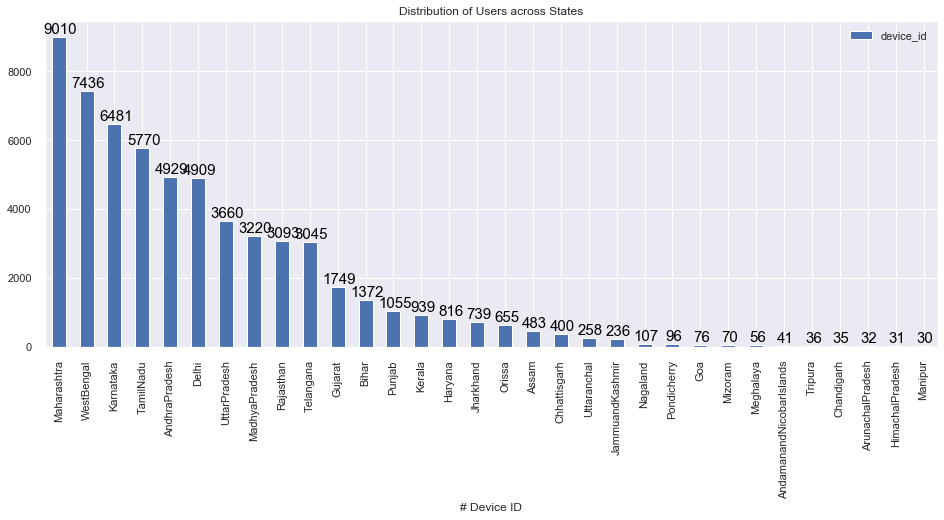

In [ ]:
plt.figure(figsize=(16,6))
ax = df_unique_device_data.groupby('state').device_id.count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Users across States');
plt.xlabel("# Device ID")
plotvalues(ax, 15)
plt.legend();

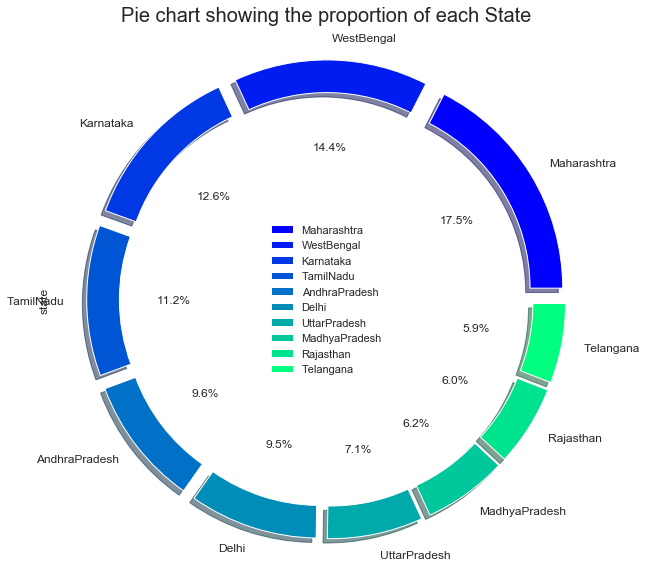

In [ ]:
space = np.ones(10)/10
df_unique_device_data['state'].value_counts()[:10].\
    sort_values(ascending=False).plot(kind='pie', explode=space, fontsize=12, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=0, figsize=(9,9), cmap='winter', legend=True)
labels = df_unique_device_data['state'].value_counts()[:10]
plt.legend(loc=10)
plt.tight_layout()
plt.title('Pie chart showing the proportion of each State',fontsize=20)
plt.show()

### Observations:<a class="anchor" id=section100.1></a>
- Above pie chart shows the number of users in top 10 states for the unique devices.
- It indicates that Maharashtra has the maximum number of users at 17.5%.
- West Bengal state is the second highest in terms of number of users at 14.4%
- Rajasthan and Gujarat has least share of users at around 6%


In [ ]:
df_unique_device_data['state'].value_counts()[:10].sort_values(ascending=False)

Maharashtra      9010
WestBengal       7436
Karnataka        6481
TamilNadu        5770
AndhraPradesh    4929
Delhi            4909
UttarPradesh     3660
MadhyaPradesh    3220
Rajasthan        3093
Telangana        3045
Name: state, dtype: int64

In [ ]:
finaldata_to_upload = df_unique_device_data

In [ ]:
finaldata_to_upload.device_id = finaldata_to_upload.device_id.astype(int)
finaldata_to_upload.device_id.dtype

dtype('int32')

In [ ]:
finaldata_to_upload.isnull().sum()

index           0
event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
phone_brand     0
device_model    0
gender          0
age             0
group           0
dtype: int64

In [ ]:
finaldata_to_upload.drop('index', axis=1, inplace=True)


In [ ]:

finaldata_to_upload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60865 entries, 0 to 60864
Data columns (total 12 columns):
event_id        60865 non-null int64
device_id       60865 non-null int32
timestamp       60865 non-null object
longitude       60865 non-null float64
latitude        60865 non-null float64
city            60865 non-null object
state           60865 non-null object
phone_brand     60865 non-null object
device_model    60865 non-null object
gender          60865 non-null object
age             60865 non-null int64
group           60865 non-null object
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
finaldata_to_upload.to_csv('finaldata_1011.csv')

#### TOP 10 Cities

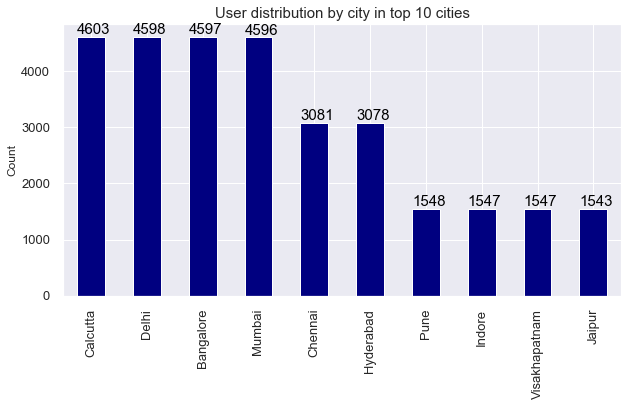

In [ ]:
ax = df_unique_device_data['city'].value_counts()[:10].sort_values(ascending=False).\
        plot(kind='bar', figsize=(10,5), fontsize=13, color='navy')
plt.ylabel('Count')
plt.title('User distribution by city in top 10 cities', fontsize=15)
plotvalues(ax, 15)
plt.show()

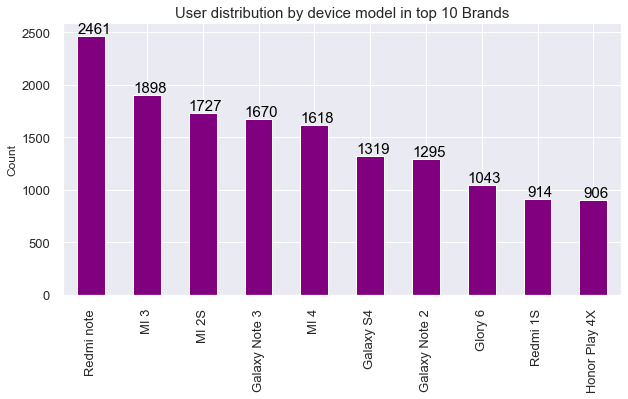

In [ ]:
ax = df_unique_device_data['device_model'].value_counts()[:10].\
    sort_values(ascending=False).plot(kind='bar', figsize=(10,5), fontsize=13, color='purple')
plt.ylabel('Count')
plt.title('User distribution by device model in top 10 Brands', fontsize=15)
plotvalues(ax, 15)
plt.show()

#### Observations
- Above Bar diagram depicts the top 10 cities across different states with highest number of users.
- Delhi remains at the top with the highest number followed by Chennai from the state of Tamil Nadu.
- Cities such as Indore, Jaipur, Calcutta, Bangalore and Hyderabad are still at the onset of telecom boom and a rise in number of users is expected over the period.

## 2.Distribution of Users(device_id) across Gender.<a class="anchor" id=section101></a>

In [ ]:
## Sreenivas
gender_device_data = all_data.groupby(['gender'])['device_id'].count().sort_values(ascending=False)
x = all_data[all_data['gender'].isin(gender_device_data.index)]
unique_gender_device_data = x.drop_duplicates(subset='device_id', keep="first").reset_index()

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

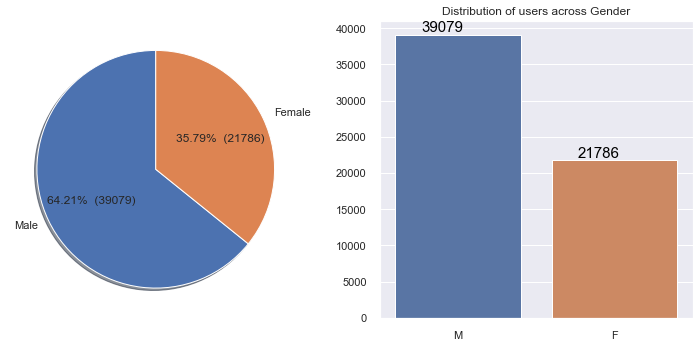

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
explode = (0, 0.1)
values=unique_gender_device_data['gender'].value_counts()
ax1.pie(values,labels=['Male','Female'],shadow=True, startangle=90, autopct=make_autopct(values))
ax2 = sns.barplot(x=unique_gender_device_data['gender'].value_counts().index,\
            y=unique_gender_device_data['gender'].value_counts().values)
plotvalues(ax2, 15)
plt.title('Distribution of users across Gender')
plt.tight_layout()
plt.show()

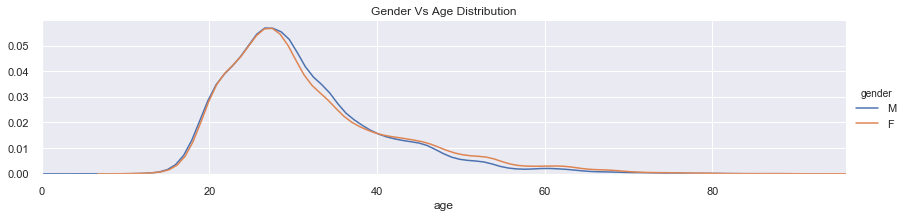

In [ ]:
facet = sns.FacetGrid(unique_gender_device_data, hue="gender",aspect=4, hue_order=['M', 'F'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, unique_gender_device_data['age'].max()))
facet.add_legend()
plt.title("Gender Vs Age Distribution")
plt.show()

## Observations<a class="anchor" id=section101.1></a>


- We can observe that Male are using more devices 
- The distribution of male and female across age is more or less same.

## 3. Distribution of Users(device_id) across phone brands (consider only 10 most used brands)<a class="anchor" id=section102></a>

In [ ]:
## Sreenivas
df_final = all_data.copy()
top10_phonebrand_deviceid_data = all_data.groupby(['phone_brand'])['device_id'].count().\
    sort_values(ascending=False)[:10]
df_pbd_top10 = all_data[all_data['phone_brand'].isin(top10_phonebrand_deviceid_data.index)]
df_pdb_unique = df_pbd_top10.drop_duplicates(subset='device_id', keep="first").reset_index()
df_pdb_unique.phone_brand.count()

57548

In [ ]:
print('Total Device IDs = ', all_data.device_id.count())
print('Total Top 10 Device IDs = ', df_pbd_top10.device_id.count())
print('Total unique Device IDs = ', all_data.device_id.nunique())
print('Total unique Top 10 Device IDs = ', df_pbd_top10.device_id.nunique())
print('Difference is ', (all_data.device_id.nunique()-df_pbd_top10.device_id.nunique()))
txt = 'This shows that {percent:.2f}% of {total:} are ruled by the top 10 brands'
print(txt.format(percent=df_pbd_top10.device_id.nunique()/ all_data.device_id.nunique()*100, \
                 total=all_data.device_id.nunique()))

Total Device IDs =  3252950
Total Top 10 Device IDs =  3090395
Total unique Device IDs =  60865
Total unique Top 10 Device IDs =  57548
Difference is  3317
This shows that 94.55% of 60865 are ruled by the top 10 brands


In [ ]:
df_pdb_unique['phone_brand'].value_counts()

Xiaomi     15064
Samsung    13077
Huawei     10681
vivo        5260
OPPO        4676
Meizu       3886
Coolpad     2780
HTC          872
Lenovo       651
LeEco        601
Name: phone_brand, dtype: int64

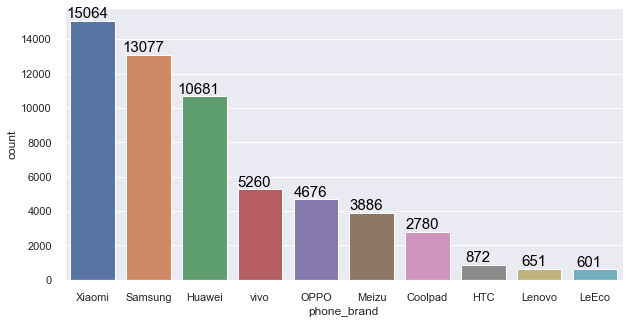

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df_pdb_unique, order = df_pdb_unique['phone_brand'].value_counts().index, x='phone_brand')
plotvalues(ax, 15)
plt.show()

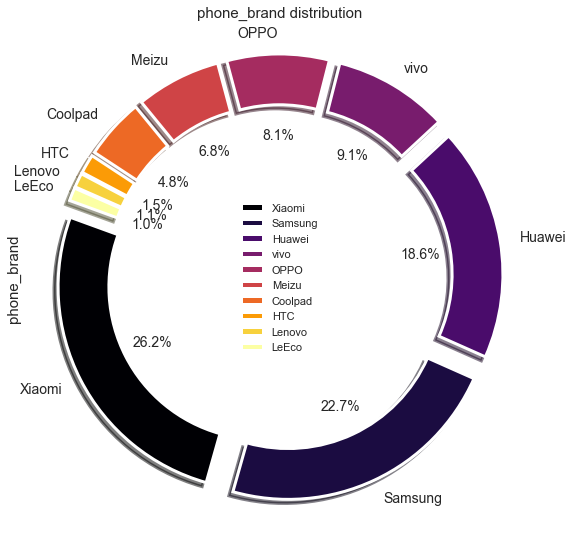

In [ ]:
space = np.ones(10)/10
df_pdb_unique['phone_brand'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.25, linewidth=3), shadow=True, labeldistance =1.1,
                                           startangle=160, figsize=(8,8), cmap='inferno', legend=True)
labels = df_pdb_unique['phone_brand']
plt.legend(loc=10)
plt.ylabel('phone_brand',fontsize=15)
plt.title('phone_brand distribution',fontsize=15)
plt.tight_layout()
plt.show()

## 4. Distribution of Users(device_id) across age segments.<a class="anchor" id=section103></a>

In [ ]:
## Lanee
df_age_users = df_pdb_unique.groupby('group')['device_id'].count().sort_values(ascending=False)
df_age_users.head()


group
M32-38    7356
M23-26    7323
M39+      6725
M22-      5676
M29-31    5611
Name: device_id, dtype: int64

In [ ]:
df_age_users.count()

12

In [ ]:
df_age_users.index

Index(['M32-38', 'M23-26', 'M39+', 'M22-', 'M29-31', 'F33-42', 'M27-28',
       'F23-', 'F29-32', 'F43+', 'F24-26', 'F27-28'],
      dtype='object', name='group')

In [ ]:
df_age_users_data = df_pdb_unique[df_pdb_unique['group'].isin(df_age_users.index)]
df_age_users_data.count()
pd.crosstab(df_age_users_data['gender'],df_age_users_data['group'])

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
gender,,,,,,,,,,,,
F,3866,3210,2409,3595,4317,3294,0,0,0,0,0,0
M,0,0,0,0,0,0,5676,7323,4166,5611,7356,6725


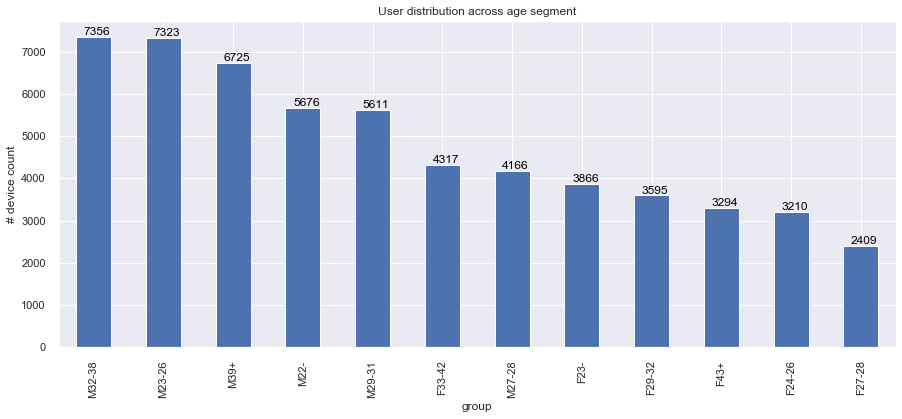

In [ ]:
plt.figure(figsize = (15, 6))
ax = df_age_users_data.groupby(['group'])['device_id'].count().\
    sort_values(ascending=False).plot(kind='bar')
plt.title('User distribution across age segment')
plt.ylabel('# device count',fontsize=12)
plotvalues(ax,12 )
plt.show()

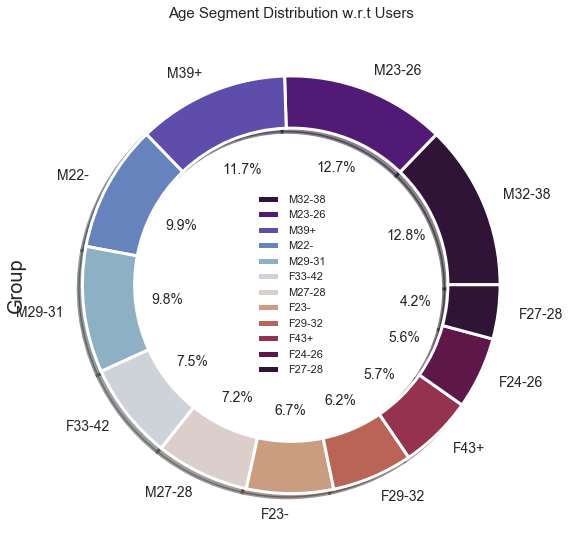

In [ ]:
df_age_users_data['group'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.25, linewidth=3), shadow=True, labeldistance =1.1,
                                           startangle=0, figsize=(8,8), cmap='twilight_shifted', legend=True)
labels = df_age_users_data['group']
# plt.legend(loc=0)
plt.ylabel('Group',fontsize=20)
plt.title('Age Segment Distribution w.r.t Users',fontsize=15)
plt.tight_layout()
plt.show()
final_list = df_age_users_data

## 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.<a class="anchor" id=section104></a>


### 5.1 Distribution of Phone brand for each age segment<a class="anchor" id=section104.1></a>

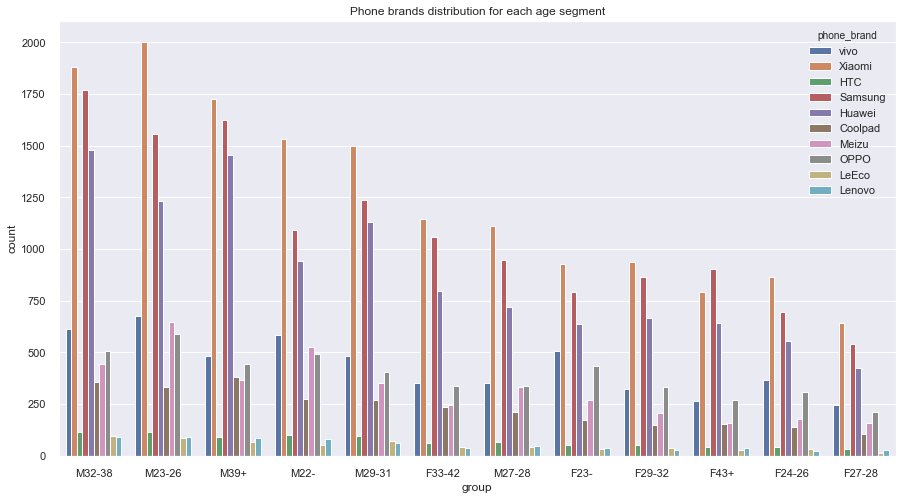

In [ ]:
## Anupama
#Age Segment, state, Gender
df_top10_states
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='group', hue="phone_brand",order=df_pdb_unique.group.value_counts().index, 
              data=df_pdb_unique, ax=axis1)
plt.title('Phone brands distribution for each age segment')
plt.show()

### 5.2 Distribution of Phone brands for each state (Top 10 states)<a class="anchor" id=section104.2></a>

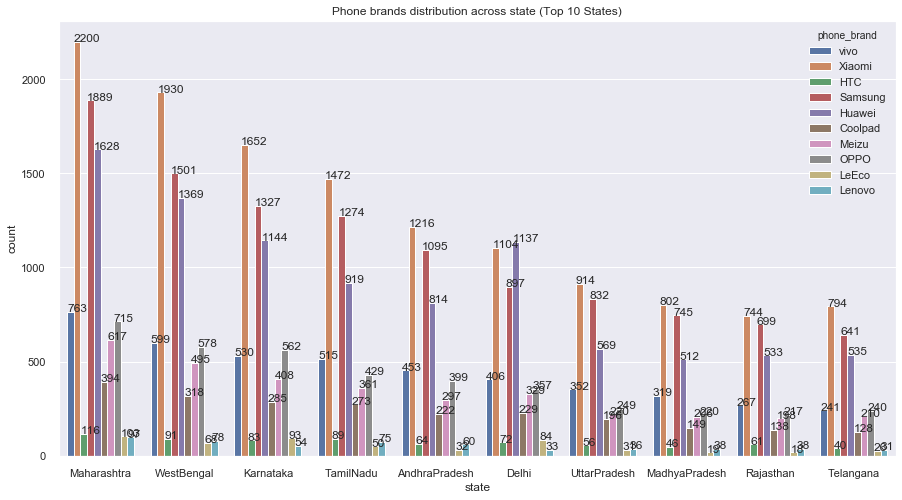

In [ ]:
df_top10_states
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
ax = sns.countplot(x='state', hue="phone_brand",order=df_pdb_unique.state.value_counts()[:10].index, 
              data=df_pdb_unique, ax=axis1)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('Phone brands distribution across state (Top 10 States)')
plt.show()

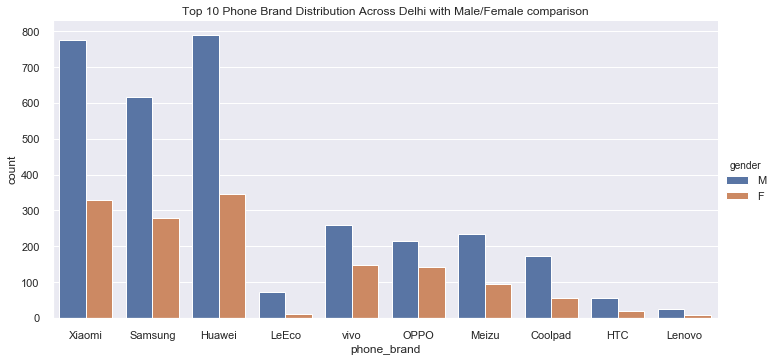

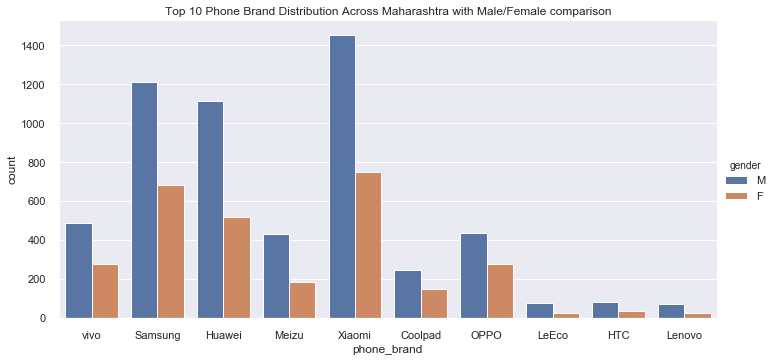

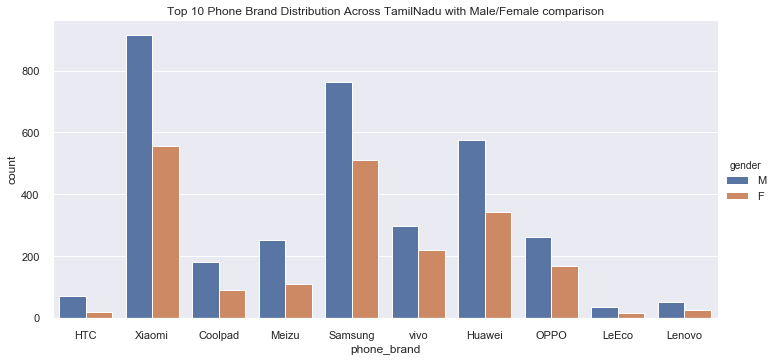

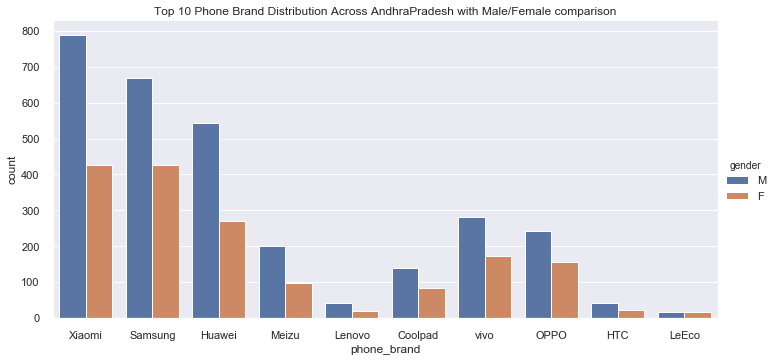

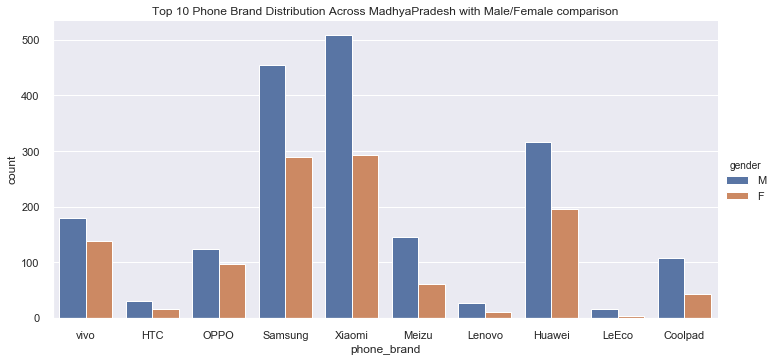

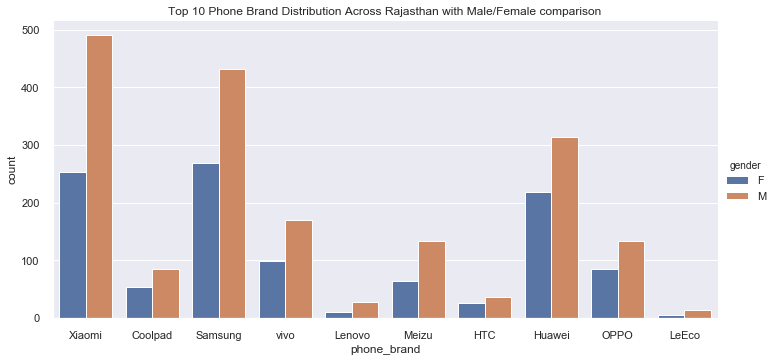

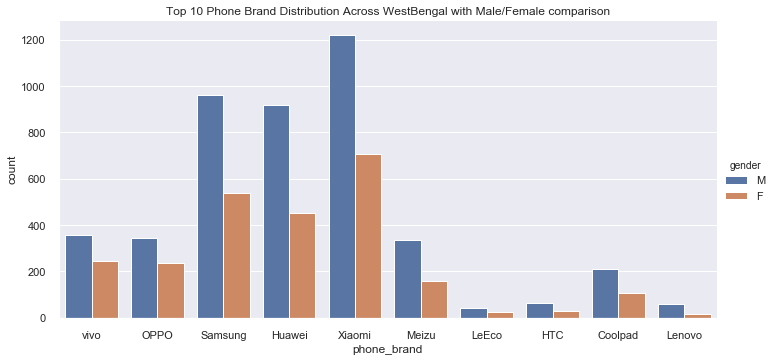

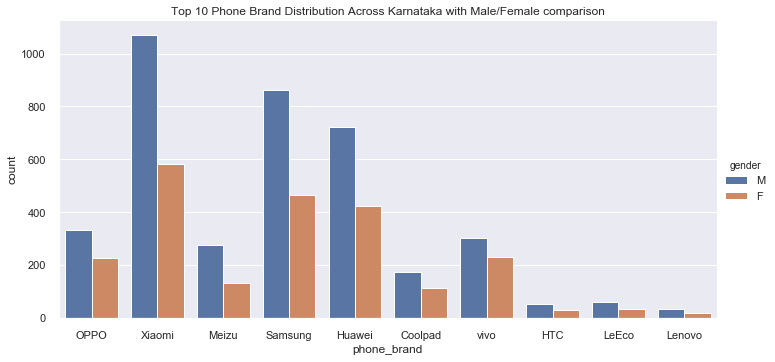

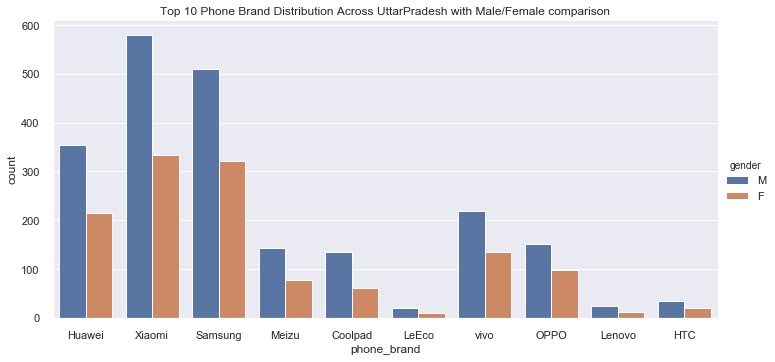

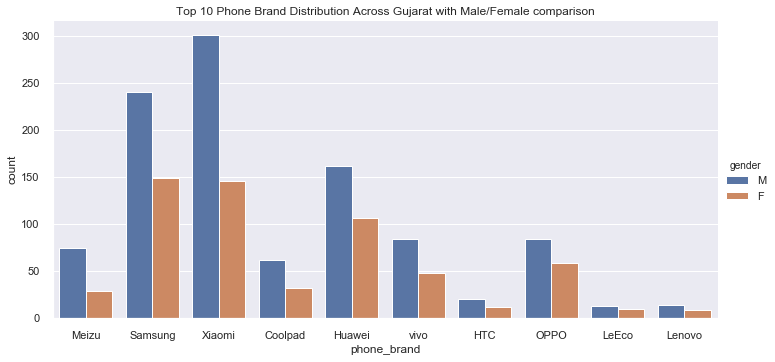

In [ ]:
for i in top10_states.index:
    ax = sns.catplot(x ="phone_brand", hue ="gender",kind ="count", data = df_pdb_unique[df_pdb_unique['state']==i], \
                     height=5, aspect=2)
    plt.title("Top 10 Phone Brand Distribution Across " + i + ' with Male/Female comparison')
    plt.show()
    #plotvalues(ax, 12)

### 5.3 Distribution of Phone brands across gender<a class="anchor" id=section104.3></a>

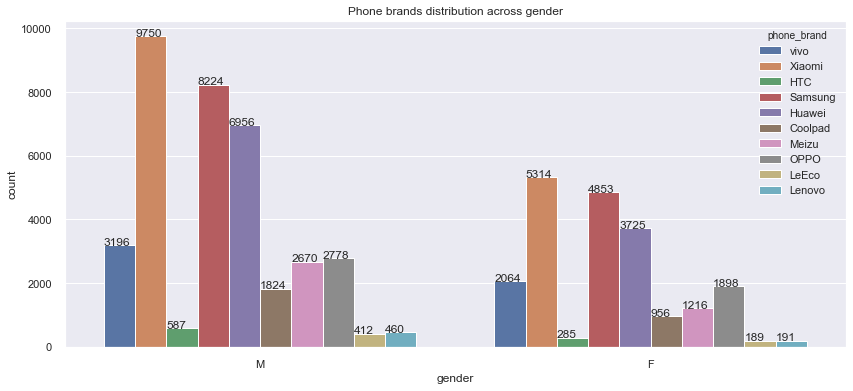

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(14,6))
ax = sns.countplot(x='gender', hue="phone_brand",order=df_pdb_unique.gender.value_counts().index, 
              data=df_pdb_unique, ax=axis1)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('Phone brands distribution across gender')
plt.show()

### Observations<a class="anchor" id=section104.3.1></a>
- Xiaomi brand is used widely in both male and female genders, followed by Samsung and Huwaei

<a class="anchor" id=section201></a>
## 6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands). 


### 6.1 Distribution of Gender for each state<a class="anchor" id=section201_1></a>

In [ ]:
df_unique_device_top10_states = df_top10_states.drop_duplicates(subset='device_id', keep="first").reset_index()
pd.crosstab(df_unique_device_top10_states.gender, df_unique_device_top10_states.state, margins=True, margins_name="Total")

state,AndhraPradesh,Delhi,Gujarat,Karnataka,MadhyaPradesh,Maharashtra,Rajasthan,TamilNadu,UttarPradesh,WestBengal,Total
gender,,,,,,,,,,,
F,1784,1505,634,2359,1198,3059,1142,2165,1355,2647,17848
M,3145,3404,1115,4122,2022,5951,1951,3605,2305,4789,32409
Total,4929,4909,1749,6481,3220,9010,3093,5770,3660,7436,50257


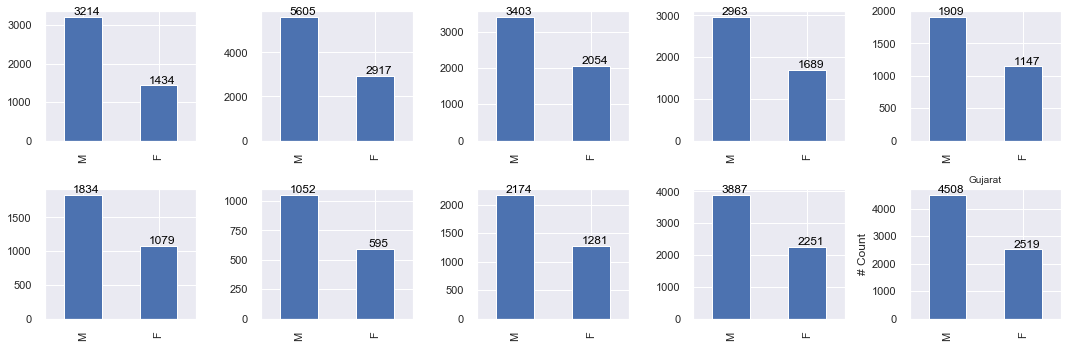

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(15,5))
plt.title('Distribution of gender for each state')
for i in [0, 1, 2, 3, 4]:
    state = top10_states.index[i]
    ax = df_pdb_unique[df_pdb_unique['state']==state]['gender'].value_counts().head().plot.bar(ax=axes[0, i])
    plt.title(state, fontsize=10)
    plt.ylabel('# Count')
    plotvalues(ax, 12)

for i in [5, 6, 7, 8, 9]:
    state = top10_states.index[i]
    ax = df_pdb_unique[df_pdb_unique['state']==state]['gender'].value_counts().head().plot.bar(ax=axes[1, 5-i])
    plt.title(state, fontsize=10)
    plt.ylabel('# Count')
    plotvalues(ax, 12)
plt.tight_layout()
plt.show()

### Observations <a class="anchor" id=section201_1_1></a>

- Out of top 10 states phone is actively used by Males in all states
- In Maharashtra state, both Male and Female are actively using compared to other states, followed by WestBengal, Karnataka, TamilNadu having same active usage in the order mentioned.
- In general it appears that more activity is present in metros followed by states with top cities like AP, UP, RAJ, GUJ

### 6.2 Distribution of Gender for each Age segment<a class="anchor" id=section201_2></a>

In [ ]:
pd.crosstab(df_pdb_unique.gender, df_pdb_unique.group, margins=True, margins_name="Total")

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+,Total
gender,,,,,,,,,,,,,
F,3866,3210,2409,3595,4317,3294,0,0,0,0,0,0,20691
M,0,0,0,0,0,0,5676,7323,4166,5611,7356,6725,36857
Total,3866,3210,2409,3595,4317,3294,5676,7323,4166,5611,7356,6725,57548


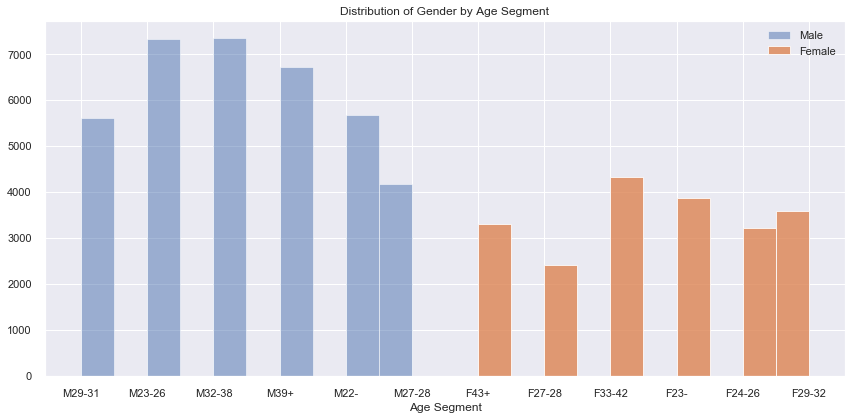

In [ ]:
## Dhina
plt.figure(figsize=(12,6))
ax1 = plt.hist('group', data=df_pdb_unique[df_pdb_unique['gender'] == 'M'], alpha=0.5, label='Male');
#plotvalues(ax1, 12)
ax2 = plt.hist('group', data=df_pdb_unique[df_pdb_unique['gender'] == 'F'], alpha=0.8, label='Female');
#plotvalues(ax1, 12)
plt.title('Distribution of Gender by Age Segment');
plt.xlabel('Age Segment');

plt.tight_layout()
plt.legend();

### 6.3 Distribution of Gender for each brand <a class="anchor" id=section201_3></a>

In [ ]:
pd.crosstab(df_pdb_unique.gender, df_pdb_unique.phone_brand, margins=True, margins_name="Total")

phone_brand,Coolpad,HTC,Huawei,LeEco,Lenovo,Meizu,OPPO,Samsung,Xiaomi,vivo,Total
gender,,,,,,,,,,,
F,956,285,3725,189,191,1216,1898,4853,5314,2064,20691
M,1824,587,6956,412,460,2670,2778,8224,9750,3196,36857
Total,2780,872,10681,601,651,3886,4676,13077,15064,5260,57548


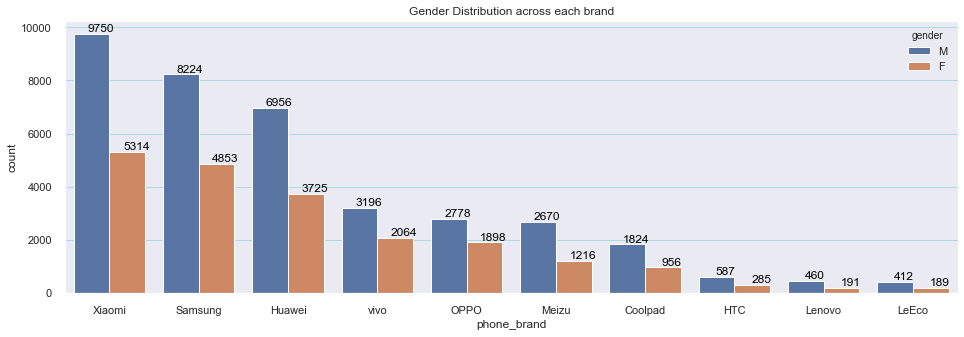

In [ ]:
from seaborn import axes_style
with axes_style({'grid.color': "lightblue"}):
    fig, axis1 = plt.subplots(1,1,figsize=(16,5))
    sns.countplot(x='phone_brand', hue="gender", 
              order=df_pdb_unique.phone_brand.value_counts().iloc[:10].index, data=df_pdb_unique, ax=axis1)
    plotvalues(axis1, 12)
    plt.title("Gender Distribution across each brand")


### Observations  <a class="anchor" id=section201_3_1></a>
- In each brand Males are using more the respective brand than females
- The variation of usage is more in Xiaomi (Males are using 4436 units more than females), Samsung( Males are using 3371 units more than females) and Huawei (Males are using 3231 units more than females)
- The percent variation of usage is in the order, Lenovo (41.3%), Meizu (37.4%) and LeEco(37.1%) followed by others. Surprising the percent variation is less in the top brand xiaomi (29.45%) though the absolute difference is high



<a class="anchor" id=section202></a>
## 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).  


### 7.1 Distribution of Age segments for each state <a class="anchor" id=section202_1></a>

In [ ]:
pd.crosstab(df_unique_device_top10_states.state, df_unique_device_top10_states.group, margins=True, margins_name="Total")

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+,Total
state,,,,,,,,,,,,,
AndhraPradesh,323,285,191,317,373,295,560,697,345,463,582,498,4929
Delhi,228,200,170,254,359,294,315,548,368,550,794,829,4909
Gujarat,115,117,79,118,108,97,217,217,125,170,208,178,1749
Karnataka,421,384,263,397,511,383,595,834,469,639,817,768,6481
MadhyaPradesh,250,177,130,231,237,173,337,438,237,295,418,297,3220
Maharashtra,559,465,356,545,644,490,831,1141,688,884,1265,1142,9010
Rajasthan,227,169,135,194,242,175,326,421,230,287,365,322,3093
TamilNadu,433,340,244,396,429,323,595,765,387,498,725,635,5770
UttarPradesh,262,224,149,239,266,215,404,470,272,359,418,382,3660


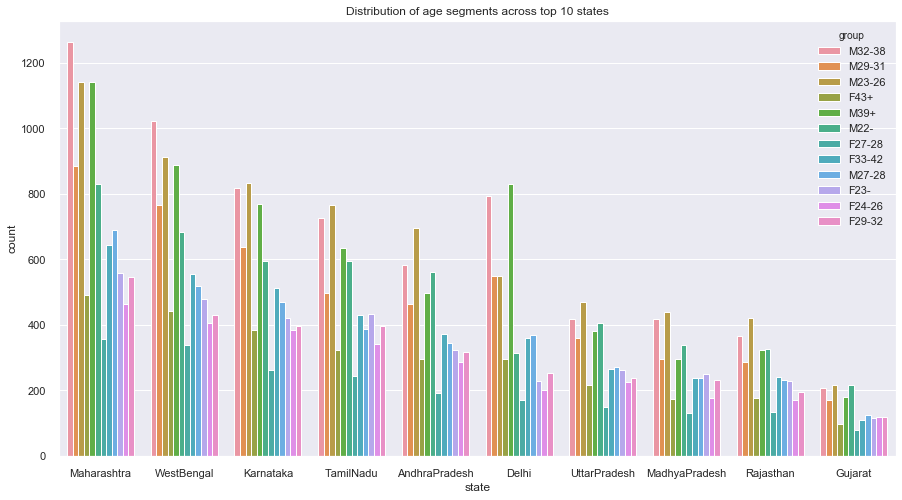

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='state', hue="group",order=df_unique_device_top10_states.state.value_counts().iloc[:10].index, 
              data=df_unique_device_top10_states, ax=axis1)
plt.title('Distribution of age segments across top 10 states')
plt.show()

### 7.2 Distribution of Age segments for each Gender <a class="anchor" id=section202_2></a>

In [ ]:
pd.crosstab(df_pdb_unique.gender, df_pdb_unique.group, margins=True, margins_name="Total")

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+,Total
gender,,,,,,,,,,,,,
F,3866,3210,2409,3595,4317,3294,0,0,0,0,0,0,20691
M,0,0,0,0,0,0,5676,7323,4166,5611,7356,6725,36857
Total,3866,3210,2409,3595,4317,3294,5676,7323,4166,5611,7356,6725,57548


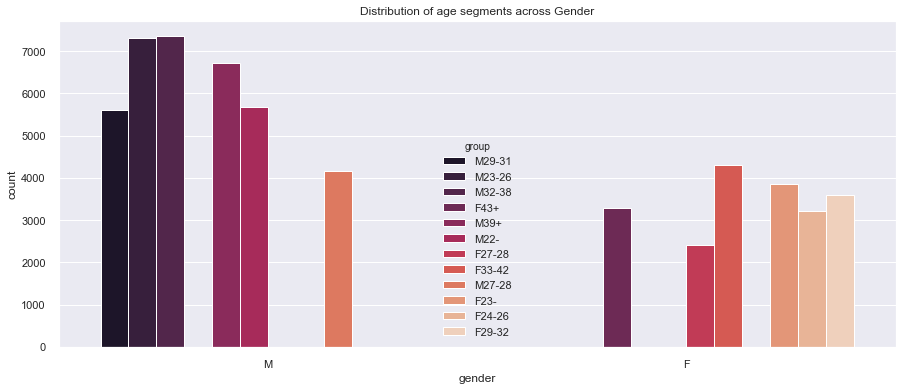

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,6))
ax = sns.countplot(x='gender', hue="group",order=df_pdb_unique.gender.value_counts().iloc[:10].index, 
              data=df_pdb_unique, ax=axis1, palette="rocket")
plt.title('Distribution of age segments across Gender')
plt.show()

- AGe group wise, Males with 22 to 39 are very active comapred to similar female age group.

### 7.3 Distribution of Age segments for each Phone_brand<a class="anchor" id=section202_3></a>

In [ ]:
df_pdb_unique_sorted = df_pdb_unique.sort_values(by='phone_brand', ascending=False)
pd.crosstab(df_pdb_unique_sorted.phone_brand, df_pdb_unique_sorted.group, margins=True, margins_name="Total")

group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+,Total
phone_brand,,,,,,,,,,,,,
Coolpad,174,139,105,149,234,155,274,332,213,270,355,380,2780
HTC,53,41,33,50,64,44,101,113,65,98,117,93,872
Huawei,639,557,426,667,795,641,941,1233,721,1131,1477,1453,10681
LeEco,33,34,14,37,41,30,52,86,42,72,94,66,601
Lenovo,37,21,27,27,40,39,82,92,45,62,91,88,651
Meizu,271,177,158,205,248,157,525,645,333,353,446,368,3886
OPPO,434,310,213,333,338,270,492,591,338,405,508,444,4676
Samsung,790,696,541,865,1060,901,1092,1554,945,1239,1771,1623,13077
Xiaomi,929,867,644,937,1145,792,1532,2003,1112,1496,1882,1725,15064


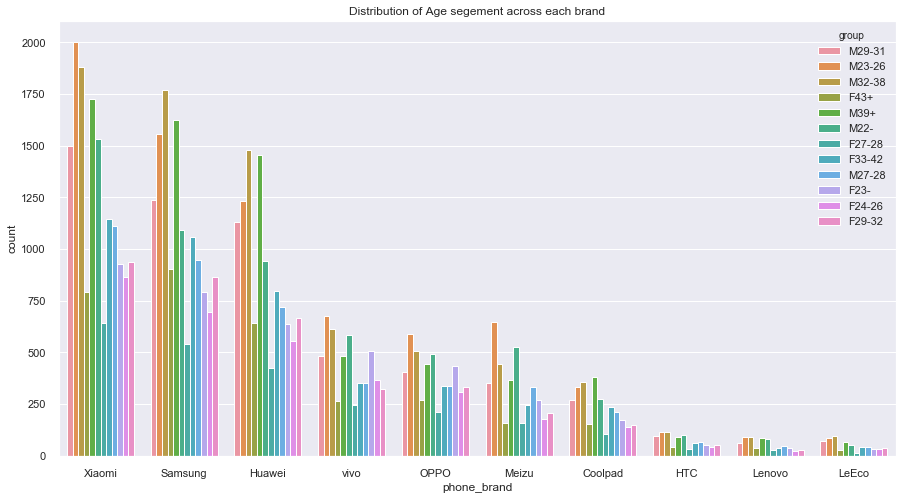

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='phone_brand', hue="group",order=df_pdb_unique.phone_brand.value_counts().iloc[:10].index, 
              data=df_pdb_unique, ax=axis1)
plt.title('Distribution of Age segement across each brand')
plt.show()

## 8. Hourly distribution of Phone Calls. <a class="anchor" id=section203></a>

In [ ]:
## Sreenivas
df_hourlydist = all_data.copy()
df_hourlydist['timestamp'] = pd.to_datetime(df_hourlydist['timestamp'])
df_hourlydist['date'] = pd.to_datetime(df_hourlydist['timestamp']).dt.date
df_hourlydist['time'] = pd.to_datetime(df_hourlydist['timestamp']).dt.time
df_hourlydist['date'] = pd.to_datetime(df_hourlydist['date'])
df_hourlydist['day'] = pd.to_datetime(df_hourlydist['timestamp']).dt.weekday_name
df_hourlydist['month']= pd.to_datetime(df_hourlydist['timestamp']).dt.month

In [ ]:
df_hourlydist.sample(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group,date,time,day,month
839182,1803823,1.197684e+18,2016-05-07 13:56:05,88.411306,22.615259,Calcutta,WestBengal,vivo,Y28L,M,28,M27-28,2016-05-07,13:56:05,Saturday,5
2684213,2614602,3.934382e+18,2016-05-07 12:36:29,77.238082,28.688863,Delhi,Delhi,Huawei,Ascend P6,F,29,F29-32,2016-05-07,12:36:29,Saturday,5
1844785,1658105,8.879673e+18,2016-05-02 20:58:21,77.308552,28.757125,Delhi,Delhi,OPPO,R6007,M,31,M29-31,2016-05-02,20:58:21,Monday,5
3033508,1275695,5.803016e+18,2016-05-06 08:10:33,80.318267,13.146728,Chennai,TamilNadu,Samsung,Galaxy S6,M,30,M29-31,2016-05-06,08:10:33,Friday,5
146275,2395532,2.489855e+18,2016-05-06 11:36:51,73.876164,18.550515,Pune,Maharashtra,Huawei,G620-L75,F,24,F24-26,2016-05-06,11:36:51,Friday,5


In [ ]:
#Assuming 24 hours clock format
def find_time_range(val):
    if(val >= time(8,0) and val < time(12,0)):
        return '08 to 12'
    elif(val >= time(12,0) and val < time(16,0)):
        return '12 to 16'
    elif(val >= time(16,0) and val < time(20,0)):
        return '16 to 20'
    elif(val >= time(20,0) and val < time(23,59)):
        return '20 to 00'
    elif(val >= time(0,0) and val < time(4,0)):
        return '00 to 04'
    elif(val >= time(4,0) and val < time(8,0)):
        return '04 to 08'

In [ ]:
df_hourlydist['timestamp'].sample(5)

565490    2016-05-06 04:57:01
2111438   2016-05-04 01:24:54
1469052   2016-05-01 10:03:37
2850476   2016-05-01 12:24:45
2889054   2016-05-04 23:04:44
Name: timestamp, dtype: datetime64[ns]

In [ ]:
df_hourlydist['time_range'] = df_hourlydist['timestamp'].dt.hour

### Hourly Distribution across age groups  <a class="anchor" id=section203_1></a>

<Figure size 1296x360 with 0 Axes>

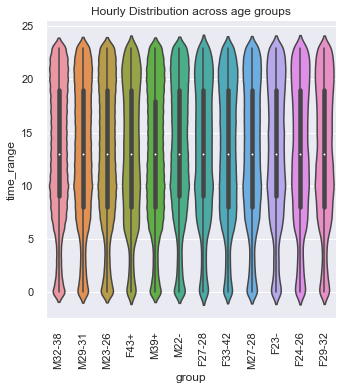

In [ ]:
plt.figure(figsize=(18,5))
g = sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist)
g.set_xticklabels(rotation=90)
plt.title('Hourly Distribution across age groups')
plt.show()

### Hourly distribution of phonecalls by age group for Male  <a class="anchor" id=section203_2></a>

<Figure size 1080x360 with 0 Axes>

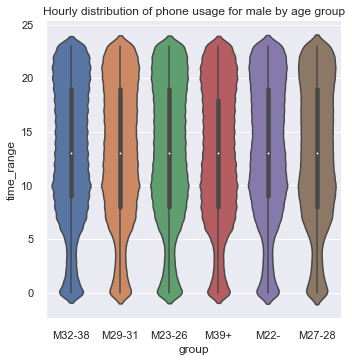

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist[df_hourlydist['gender']=='M'])
g.set_xticklabels(rotation=90)
plt.title('Hourly distribution of phone usage for male by age group')
plt.show()

### Hourly distribution of phonecalls by age group for Female <a class="anchor" id=section203_3></a>

<Figure size 1080x360 with 0 Axes>

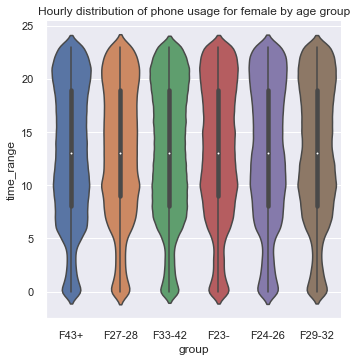

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist[df_hourlydist['gender']=='F'])
g.set_xticklabels(rotation=90)
plt.title('Hourly distribution of phone usage for female by age group')
plt.show()

### Observations <a class="anchor" id=section203_3_1></a>
1. We have categorised the clock in to 6 segments of 4 hours each from 8-12,12-16...4-8.
2. People across all age group are inactive between 12-5 as its sleeping time.
3. 10 to 12 is a very active time, similar 8 pm to 10 pm is another active time.
4. Male and Females are more or less following the same pattern across all age group.

### Hourly distribution of phone usage across gender <a class="anchor" id=section203_4></a>

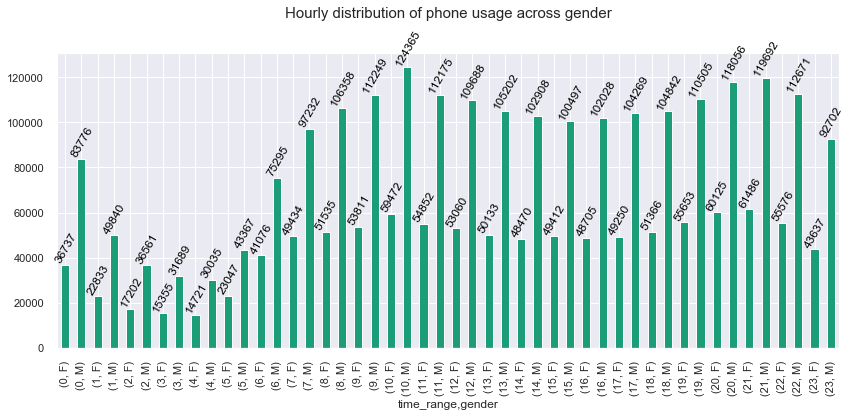

In [ ]:
ax = df_hourlydist.groupby(['time_range','gender'])['event_id'].count().\
    plot(kind='bar',figsize=(12, 6),colormap='Dark2')
plt.title('Hourly distribution of phone usage across gender', fontsize=15,  y=1.1)
plotvalues(ax, 12, 60)
plt.tight_layout()
plt.show()

### Observations <a class="anchor" id=section203_4_1></a>
- 10 am time for Male is leading the hourly distribution chart.
- Phone activity start increasing after 6 am and steadily increases till 1 am.
- 10 am to 10 pm is an active phone time.
- Males use phone more compare to females for all time slots.

## Distribution of Events across States.<a class="anchor" id=section204></a>

In [ ]:
df_hourlydist[df_hourlydist['state']=='Delhi']['city'].value_counts()
top10_states

Delhi            751797
Maharashtra      677168
TamilNadu        436329
AndhraPradesh    321379
MadhyaPradesh    232741
Rajasthan        196410
WestBengal       196203
Karnataka         99072
UttarPradesh      94750
Gujarat           42881
Name: state, dtype: int64

### Distribution of events within Delhi cities<a class="anchor" id=section204_1></a>

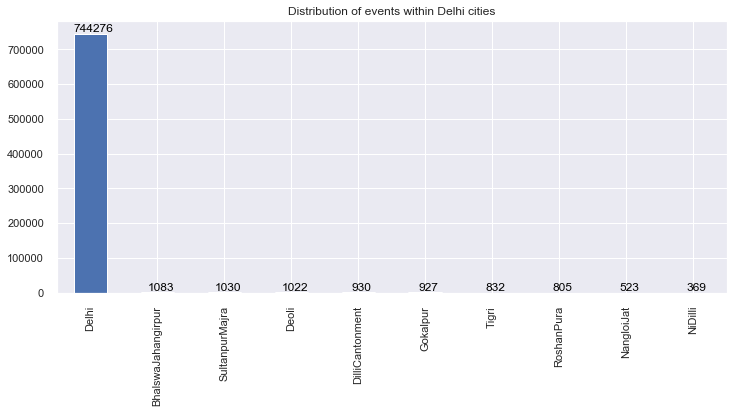

In [ ]:
### Distribution of events within Delhi cities<a class="anchor" id=section204_1></a>plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='Delhi']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within Delhi cities')
plotvalues(ax, 12)
plt.show()

#### Observations <a class="anchor" id=section204_1_1></a>
- Delhi city has highest events (744276) generated
- All other cities in Delhi have very less number of events generated.
- This is again an opportunity to focus and put additional special plans for these cities

### Distribution of events within Maharashtra cities <a class="anchor" id=section204_2></a>

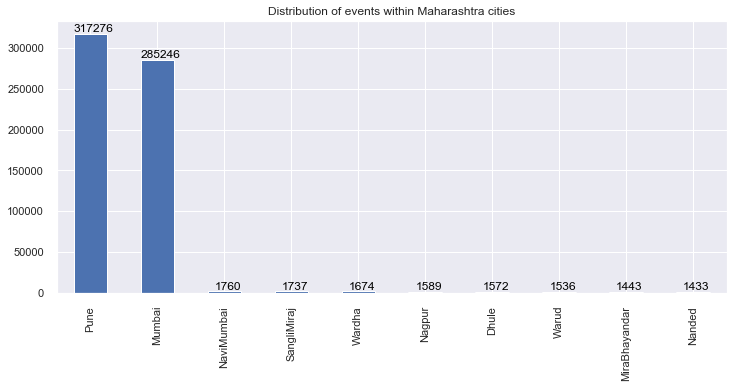

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='Maharashtra']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within Maharashtra cities')
plotvalues(ax, 12)
plt.show()

In [ ]:
df_mum = df_hourlydist[df_hourlydist['city']=='Mumbai']
df_mum.head(2)
df_pun = df_hourlydist[df_hourlydist['city']=='Pune']
df_pun.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group,date,time,day,month,time_range
11,13998,3.978026e+18,2016-05-06 13:12:42,73.875196,18.615791,Pune,Maharashtra,Samsung,Galaxy S3,M,19,M22-,2016-05-06,13:12:42,Friday,5,13
20,1378252,4.384474e+18,2016-05-05 04:20:02,73.914179,18.619081,Pune,Maharashtra,Huawei,Glory 3C,M,25,M23-26,2016-05-05,04:20:02,Thursday,5,4


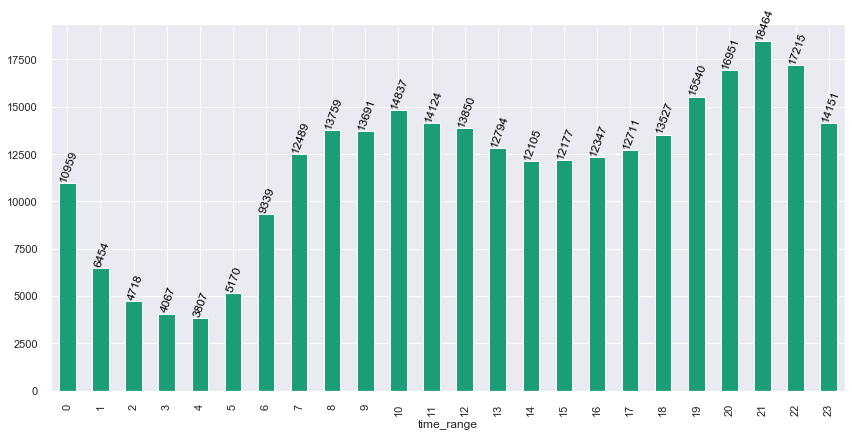

In [ ]:
ax = df_mum.groupby(['time_range'])['city'].count()[:25].\
    plot(kind='bar',figsize=(12, 6),colormap='Dark2')
plt.tight_layout()
plotvalues(ax, 12, 70)

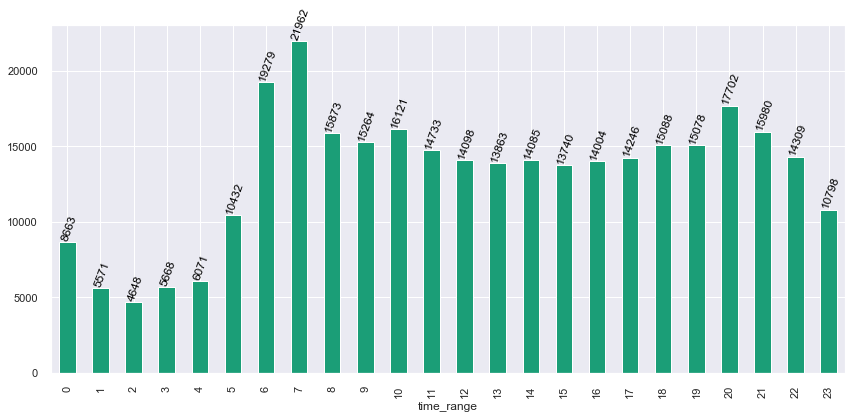

In [ ]:
ax = df_pun.groupby(['time_range'])['city'].count()[:25].\
    plot(kind='bar',figsize=(12, 6),colormap='Dark2')
plotvalues(ax, 12, 70)
plt.tight_layout()
plt.show()

#### Observations <a class="anchor" id=section204_2_1></a>
- In Maharashtra only two cities are having major phone activity and they are Mumbai and Pune
- In mumbai and pune the distribution of phone usage is different
- In mumbai, the peak hours are 8 to 10 PM, where as in pune it is 7 AM
- This is again an opportunity to focus and put additional special plans for cities other than Mumbai Pune.
- Also speical plans can be introduced for non-peak hours.

### Distribution of events within TamilNadu cities <a class="anchor" id=section204_3></a>

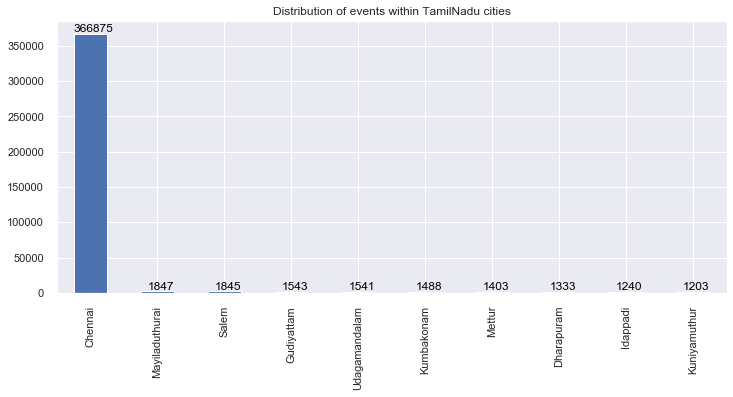

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='TamilNadu']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within TamilNadu cities')
plotvalues(ax, 12)
plt.show()

#### Observartions <a class="anchor" id=section204_3_1></a>
- In TamilNadu, Most of the phone activity is in Chennai only
- Rest other cities in TamilNadu are having very little phone activity.

### Distribution of events within Andhra Pradesh cities <a class="anchor" id=section204_4></a>

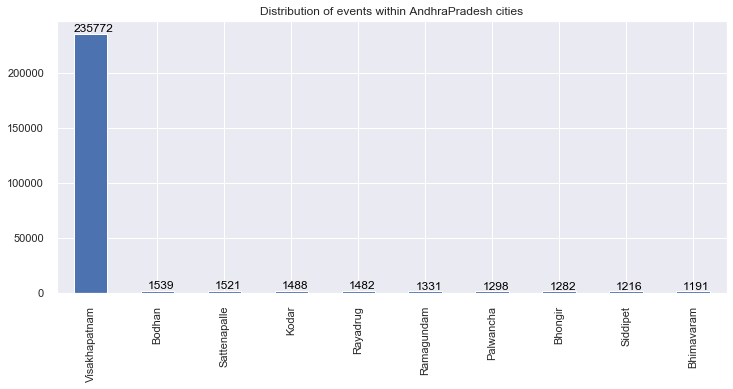

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='AndhraPradesh']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within AndhraPradesh cities')
plotvalues(ax, 12)
plt.show()

#### Observations <a class="anchor" id=section204_4_1></a>
- In Andhra Pradesh, Most of the phone activity is concentrated in Visakhapatnam city only
- Rest other cities in Andhra Pradesh are having very little phone activity.

### Distribution of events within MadhyaPradesh cities <a class="anchor" id=section204_5></a>

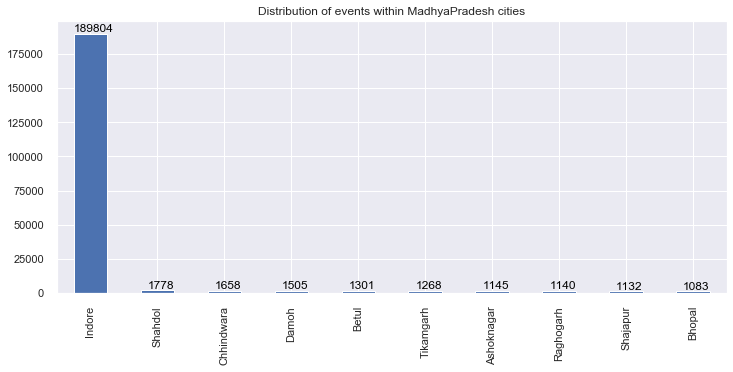

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='MadhyaPradesh']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within MadhyaPradesh cities')
plotvalues(ax, 12)
plt.show()

#### Observations <a class="anchor" id=section204_5_1></a>
- In Madhya Pradesh, Most of the phone activity is concentrated in Indore city only
- Rest other cities in Madhya Pradesh are having very little phone activity.

### Distribution of events within West Bengal cities <a class="anchor" id=section204_6></a>

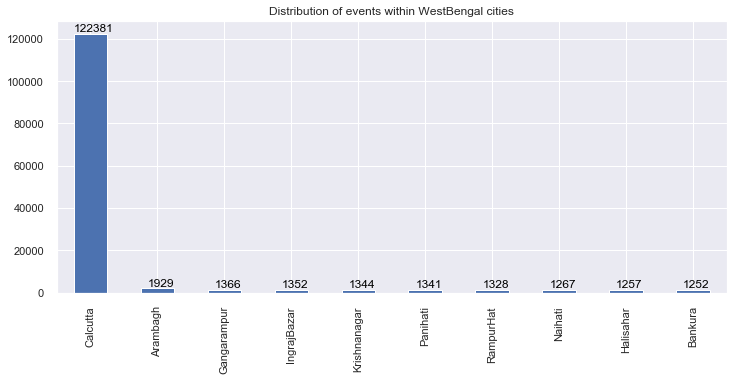

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='WestBengal']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within WestBengal cities')
plotvalues(ax, 12)
plt.show()

#### Observations <a class="anchor" id=section204_6_1></a>
- In WestBengal, Most of the phone activity is concentrated in Calcutta city only
- Rest other cities in WestBengal are having very little phone activity.

### Distribution of events within Rajasthan cities <a class="anchor" id=section204_7></a>

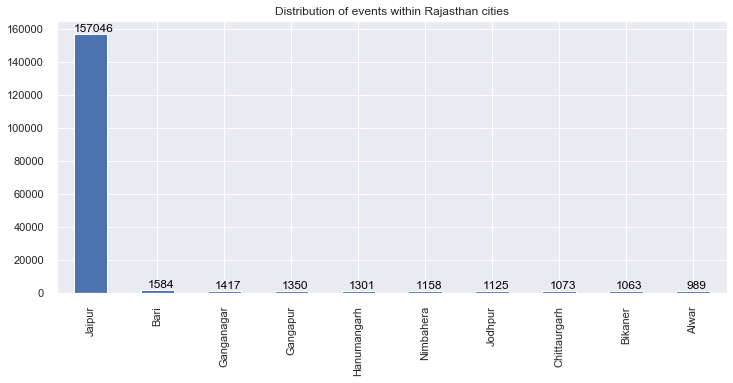

In [ ]:
plt.figure(figsize=(12,5))
ax = df_hourlydist[df_hourlydist['state']=='Rajasthan']['city'].value_counts().head(10).plot.bar()
plt.title('Distribution of events within Rajasthan cities')
plotvalues(ax, 12)
plt.show()

#### Observations <a class="anchor" id=section204_7_1></a>
- In Rajasthan, Most of the phone activity is concentrated in Jaipur city only
- Rest other cities in Rajasthan are having very little phone activity.

## Top 25 phone usage across state during different hours based on device id count <a class="anchor" id=section205></a>

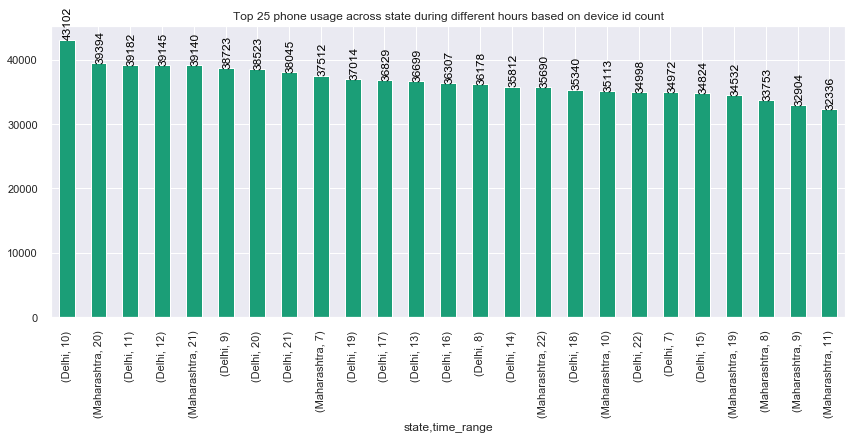

In [ ]:
ax = df_hourlydist.groupby(['state','time_range'])['device_id'].count().\
    sort_values(ascending=False)[:25].plot(kind='bar',figsize=(12, 6),colormap='Dark2')
plt.tight_layout()
plotvalues(ax, 12, 90)
plt.title('Top 25 phone usage across state during different hours based on device id count')
plt.show()

### Distribution of hourly usage based on the device id <a class="anchor" id=section206>

In [ ]:
df_hourlydist.groupby(['time_range'])['device_id'].count().sort_values(ascending=False)[:10]

time_range
10    183837
21    181178
20    178181
22    168247
11    167027
19    166158
9     166060
12    162748
8     157893
18    156208
Name: device_id, dtype: int64

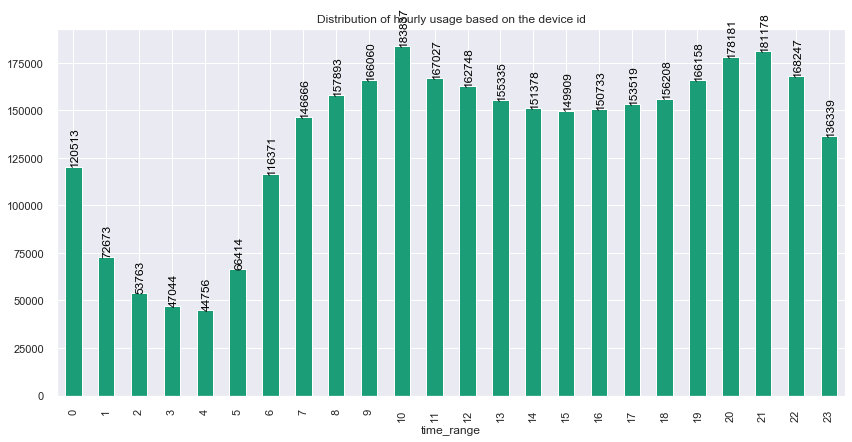

In [ ]:
ax = df_hourlydist.groupby(['time_range'])['device_id'].count()[:25].\
    plot(kind='bar',figsize=(12, 6),colormap='Dark2')
plt.tight_layout()
plotvalues(ax, 12, 90)
plt.title('Distribution of hourly usage based on the device id')
plt.show()

#### Observations
- The phone activity is concentrated by most user from 8 A.M. to 1 P.M., again from 7 P.M. to 10 P.M. with peaktime at 10 A.M. and 9 P.M.

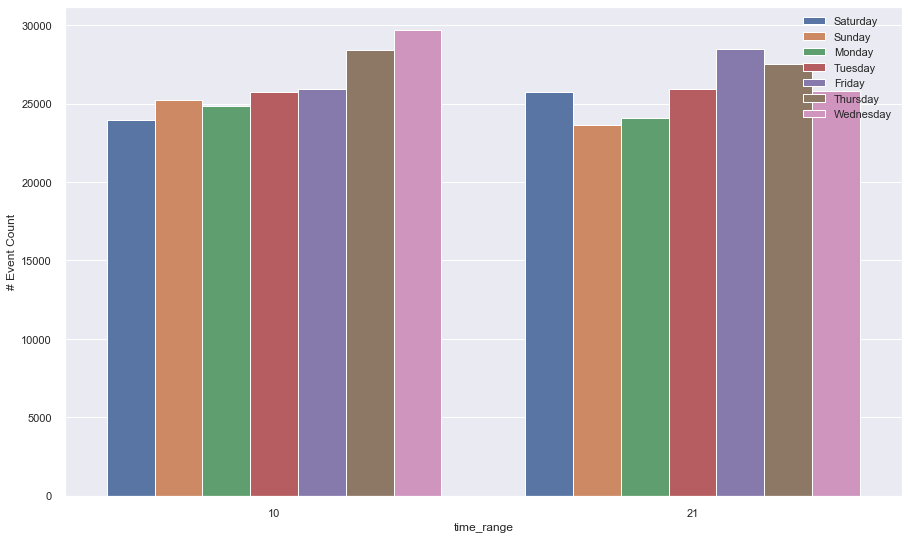

In [ ]:
plt.figure(figsize=(15,9))
ax = sns.countplot(data=df_hourlydist, x='time_range',hue='day',\
                   order=df_hourlydist.time_range.value_counts().iloc[0:2].index )
plt.ylabel('# Event Count')
plt.legend(loc='best')
#plt.legend(loc=1.2)
#plt.plot_values(ax)
plt.show()

## Plot the Users on the Map using any suitable package. <a class="anchor" id=section207></a>

In [ ]:
df_unique_device_data = all_data.drop_duplicates(subset='device_id', keep="first").reset_index()

In [ ]:
# import folium package 
import folium 
from folium.plugins import MarkerCluster

map2 = folium.Map(location=[22.356359, 79.395484], zoom_start=5)
mc2 = MarkerCluster()

state_list = df_unique_device_data.state.value_counts().iloc[:10].index
for state in state_list:
    mapping_data = df_unique_device_data[['latitude', 'longitude','city']][df_unique_device_data['state']==state].\
        drop_duplicates()
    citylist = mapping_data['city'].tolist()
        
    locations = mapping_data[['latitude', 'longitude']]
    locationlist = locations.values.tolist()
    
    for index, item in enumerate(locationlist):
        mc2.add_child(folium.Marker(location=item, popup=citylist[index],icon=folium.Icon(color='red', icon='info-sign')))
                             
map2.add_child(mc2)
map2.save("statewise_map_plot.html")

In [ ]:
#from IPython.display import IFrame
IFrame(src='statewise_map_plot.html', width=1000, height=500)